### Predictive Modelling for COVID-19 in Public Health

##### Case Scenario
In response to the COVID-19 pandemic, public health organizations have faced
immense challenges in predicting the spread of the virus and understanding key
factors that influence transmission and patient outcomes. Imagine you have been
hired as a data scientist by a public health organization, "HealthGuard Analytics," to
build a predictive modeling system. The organization requires actionable insights to
inform policies, anticipate future outbreaks, and improve health resource allocation.
Using historical COVID-19 data, you will conduct data cleaning, perform exploratory
data analysis (EDA), and develop predictive models to forecast COVID-19 trends.
You will present your findings through visualizations and provide a final report
summarizing insights and recommendations for public health responses.


###### Project Workflow
* Importing Libraries or Dependencies
* Importing Dataset
* Data Wrangling
* Exploratory Data Analysis (EDA)
   ###### Predictive Analysis
   1) Data Transformation or Preprocessing
   2) Importing Models
   3) Data Splitting
   4) Models Training
   5) Model Evaluation
   6) Model Pickling
   7) Making Predictions
###### Summary 

######  Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###### Importing Dataset

In [2]:
covid = pd.read_csv(r'C:\Users\JAMES TECH\Downloads\worldometer_data.csv')

In [3]:
covid.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [4]:
#creating a checkpoint to preserve the orginal data
df = covid.copy()

In [5]:
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [6]:
df.tail()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
204,Montserrat,North America,4992.0,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,26247.0,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3489.0,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,801.0,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe
208,Western Sahara,Africa,598682.0,10,NaN,1.0,NaN,8.0,NaN,1.0,NaN,17.0,2.0,NaN,NaN,Africa


###### Data Wrangling

* Shape

In [7]:
shape_df = df.shape
print('Number Of Columns:',shape_df[1])
print('Number Of Rows:',shape_df[0])

Number Of Columns: 16
Number Of Rows: 209


* Columns

In [8]:
df.columns.values

array(['Country/Region', 'Continent', 'Population', 'TotalCases',
       'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered',
       'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop',
       'WHO Region'], dtype=object)

* All columns are correctly capitalized and does not have spaces to strip out

* Data Types

In [9]:
df.dtypes

Country/Region       object
Continent            object
Population          float64
TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
WHO Region           object
dtype: object

* All columns have their correct datatypes

* Duplicate Values

In [10]:
df.duplicated().sum()

0

* There are no duplicate values in the dataset

###### Dataset Information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

###### Missing Values

In [12]:
df.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [13]:
df.dtypes

Country/Region       object
Continent            object
Population          float64
TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
WHO Region           object
dtype: object

###### Note
* There are several missing values in the dataset


* For columns (NewCases - 205, NewDeaths - 206, and NewRecovered - 206), I will drop them.
* This is because the number of missing values is extremely high and so imputing the missing values will increase the chances of having unrealistiv values in the dataset which will cause the result to be bias or irrelevant.
* For other columns with less missing values, I will impute the missing values using either mean for the numerical columns or mode for the categorical columns.

In [14]:
#dropping columns
df = df.drop(columns = ['NewCases', 'NewDeaths', 'NewRecovered'], axis = 1)

In [15]:
df.head()

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


'NewCases', 'NewDeaths', 'NewRecovered' dropped from the table

In [16]:
#Imputing numerical Columns
df['Population'].fillna(df['Population'].mean(),inplace = True)
df['TotalDeaths'].fillna(df['TotalDeaths'].median(), inplace = True)
df['TotalRecovered'].fillna(df['TotalRecovered'].mean(), inplace = True)
df['ActiveCases'].fillna(df['ActiveCases'].mean(), inplace = True)
df['Serious,Critical'].fillna(df['Serious,Critical'].mean(), inplace = True)
df['Tot Cases/1M pop'].fillna(df['Tot Cases/1M pop'].median(), inplace = True)
df['Deaths/1M pop'].fillna(df['Deaths/1M pop'].median(), inplace = True)
df['TotalTests'].fillna(df['TotalTests'].mean(), inplace = True)
df['Tests/1M pop'].fillna(df['Tests/1M pop'].median(), inplace = True)


In [17]:
#imputing Categorical columns their respective model values

#Continent
mode_value = df[df['Continent'].notna()]['Continent'].mode()[0]
mode_value

'Africa'

In [18]:
df['Continent'].fillna(mode_value, inplace = True)

In [19]:
#WHO Region
mode_value_1 = df[df['WHO Region'].notna()]['WHO Region'].mode()[0]
mode_value_1

'Europe'

In [20]:
#filling the missing values
df['WHO Region'].fillna(mode_value_1, inplace = True)

In [21]:
#checking to see the changes
df.isnull().sum()

Country/Region      0
Continent           0
Population          0
TotalCases          0
TotalDeaths         0
TotalRecovered      0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64

All the missing values have been handled

* Data types

In [22]:
df.dtypes

Country/Region       object
Continent            object
Population          float64
TotalCases            int64
TotalDeaths         float64
TotalRecovered      float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
WHO Region           object
dtype: object

* Apart from the Categorical columns and the "TotalCases" column, all numerical columns are in float datatypes which is not the right the type.
* So, I will replace it with the integer datatype

In [23]:
df['Population'] = df['Population'].astype('int')
df['ActiveCases'] = df['ActiveCases'].astype('int')
df['TotalDeaths'] = df['TotalDeaths'].astype('int')
df['TotalRecovered'] = df['TotalRecovered'].astype('int')
df['Serious,Critical'] = df['Serious,Critical'].astype('int')
df['Tot Cases/1M pop'] = df['Tot Cases/1M pop'].astype('int')
df['Deaths/1M pop'] = df['Deaths/1M pop'].astype('int')
df['TotalTests'] = df['TotalTests'].astype('int')
df['Tests/1M pop'] = df['Tests/1M pop'].astype('int')

In [24]:
#checking to see the effect
df.dtypes

Country/Region      object
Continent           object
Population           int32
TotalCases           int64
TotalDeaths          int32
TotalRecovered       int32
ActiveCases          int32
Serious,Critical     int32
Tot Cases/1M pop     int32
Deaths/1M pop        int32
TotalTests           int32
Tests/1M pop         int32
WHO Region          object
dtype: object

In [25]:
df.head()

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130,5032179,162804,2576668,2292707,18296,15194,492,63139605,190640,Americas
1,Brazil,South America,212710692,2917562,98644,2047660,771258,8318,13716,464,13206188,62085,Americas
2,India,Asia,1381344997,2025409,41638,1377384,606387,8944,1466,30,22149351,16035,South-EastAsia
3,Russia,Europe,145940924,871894,14606,676357,180931,2300,5974,100,29716907,203623,Europe
4,South Africa,Africa,59381566,538184,9604,387316,141264,539,9063,162,3149807,53044,Africa


###### Outliers

In [26]:
#categorical columns
object_columns = df.select_dtypes(include = ['object'])
object_columns.head()

,Country/Region,Continent,WHO Region
0,USA,North America,Americas
1,Brazil,South America,Americas
2,India,Asia,South-EastAsia
3,Russia,Europe,Europe
4,South Africa,Africa,Africa


In [27]:
#numerical_columns
numerical = df.select_dtypes(include = ['number'])
numerical.head()

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,331198130,5032179,162804,2576668,2292707,18296,15194,492,63139605,190640
1,212710692,2917562,98644,2047660,771258,8318,13716,464,13206188,62085
2,1381344997,2025409,41638,1377384,606387,8944,1466,30,22149351,16035
3,145940924,871894,14606,676357,180931,2300,5974,100,29716907,203623
4,59381566,538184,9604,387316,141264,539,9063,162,3149807,53044


In [142]:
numerical.columns.values

array(['Population', 'TotalCases', 'TotalDeaths', 'TotalRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop',
       'Deaths/1M pop', 'TotalTests', 'Tests/1M pop'], dtype=object)

<Figure size 1200x800 with 0 Axes>

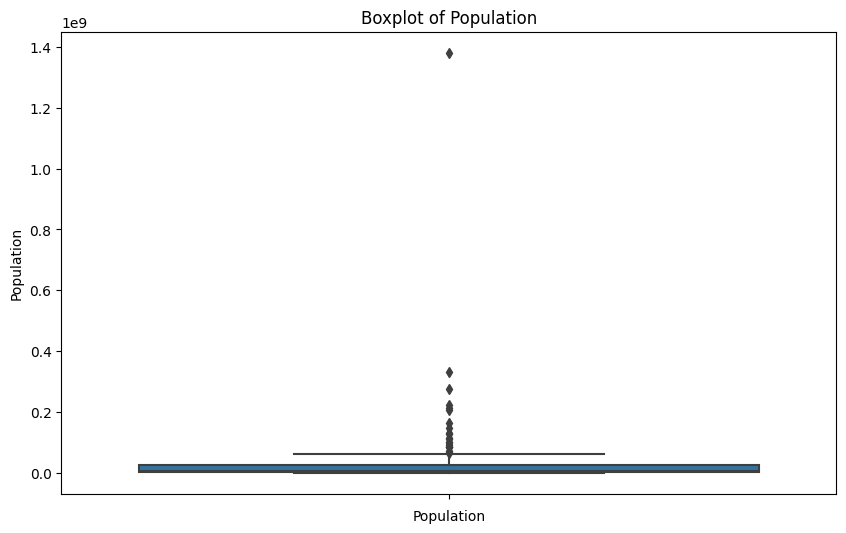

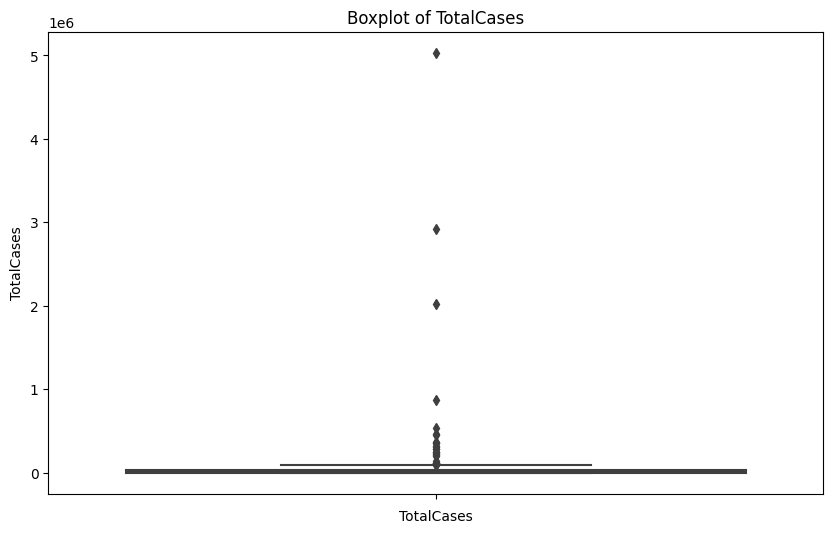

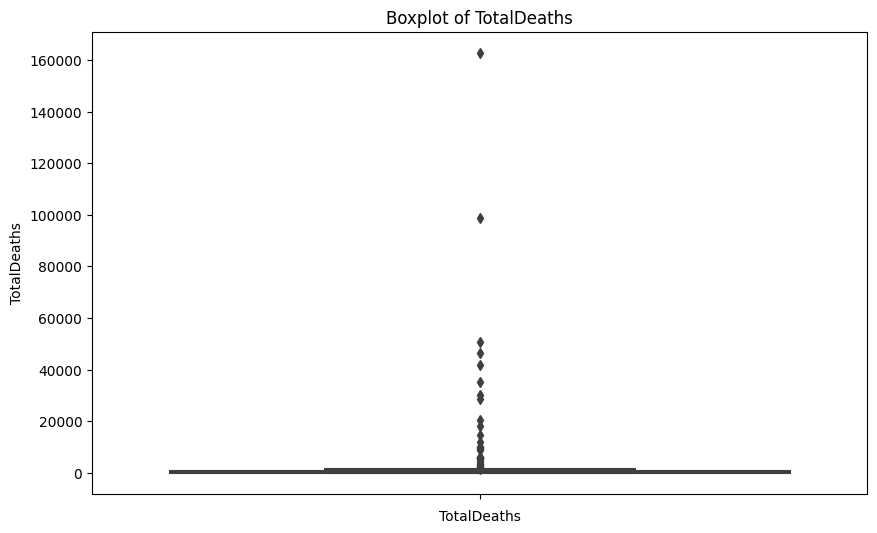

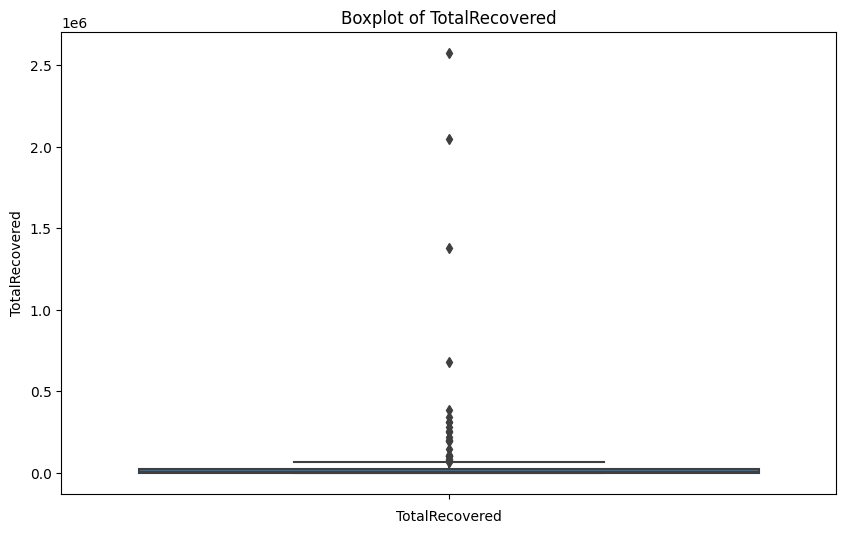

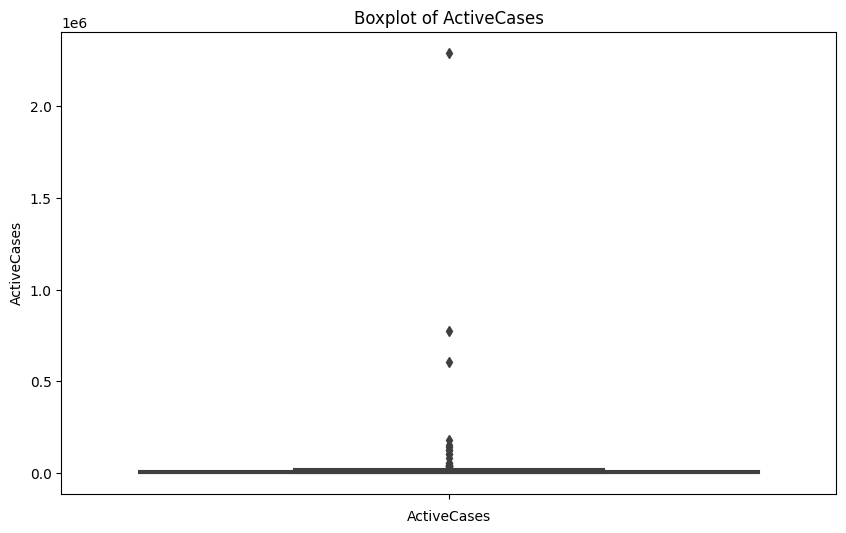

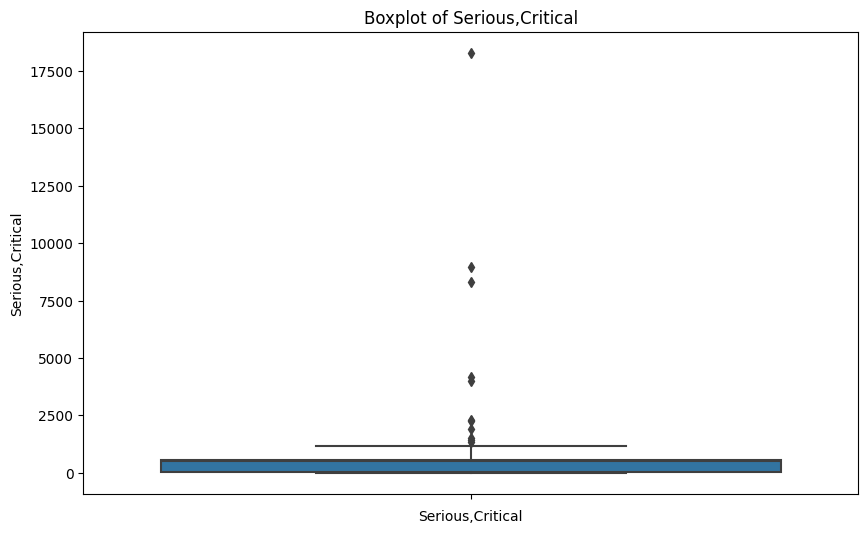

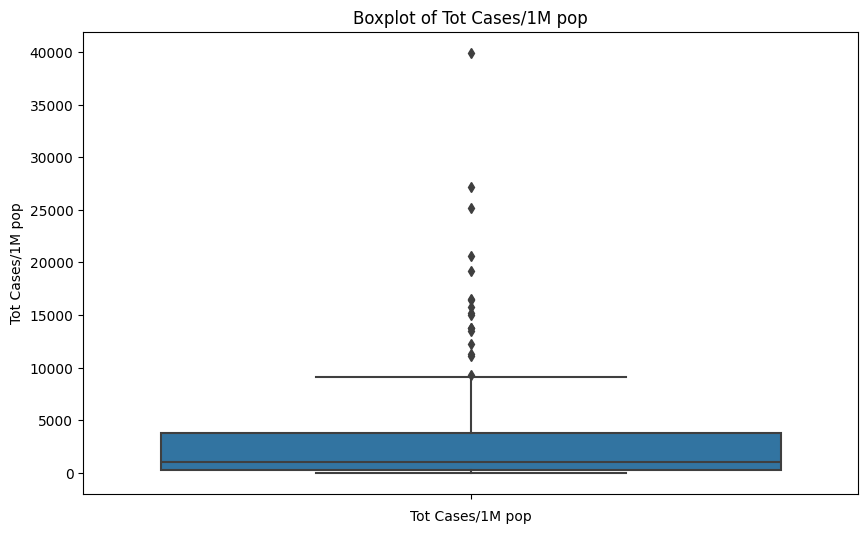

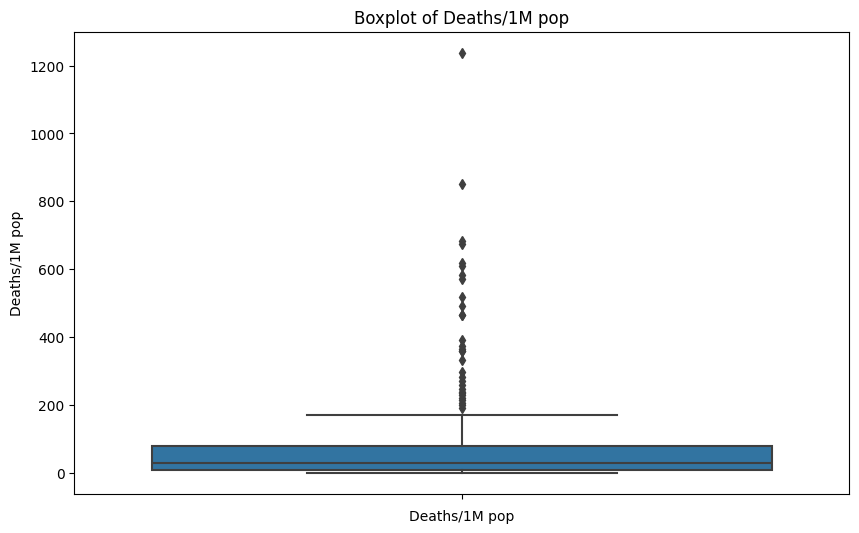

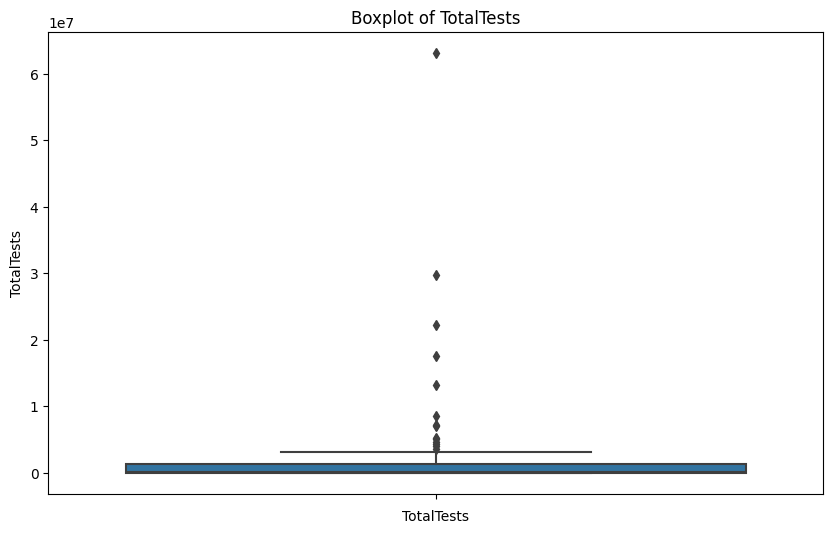

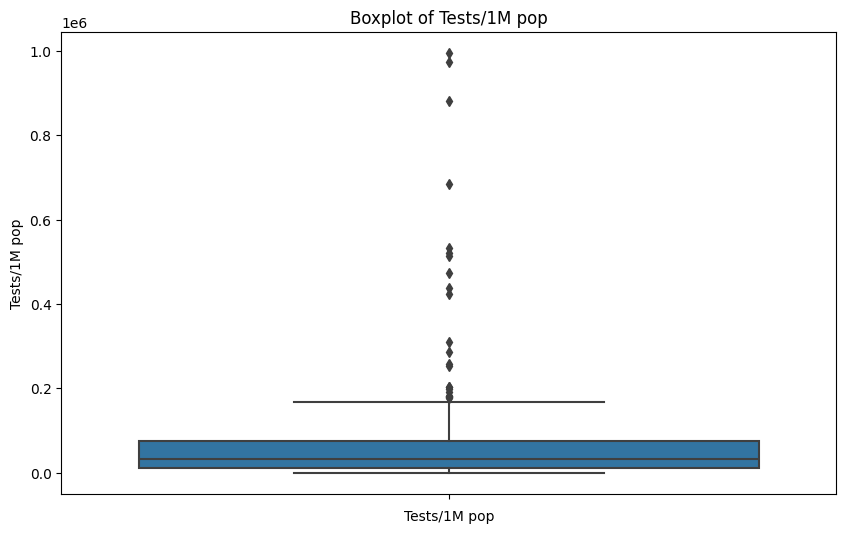

In [28]:
#Checking outliers

plt.figure(figsize=(12, 8))
for col in numerical:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

###### Note:
* All Numerical columns have outliers.
* These outliers will be removed in other to have a more better analytics result and a well performed model

In [29]:
#Removing outliers

#Population
q = df['Population'].quantile(1)
df_1 =df[df['Population']<q]

#TotalCaese
q = df_1['TotalCases'].quantile(1)
df_2 =df_1[df_1['TotalCases']<q]

#TotalDeaths
q = df_2['TotalDeaths'].quantile(1)
df_3 = df_2[df_2['TotalDeaths']<q]

#TotalRecovered
q = df_3['TotalRecovered'].quantile(1)
df_4 = df_3[df_3['TotalRecovered']<q]

#ActiveCases
q = df_4['ActiveCases'].quantile(1)
df_5 = df_4[df_4['ActiveCases']<q]

#Serious,Critical
q = df_5['Serious,Critical'].quantile(1)
df_6 = df_5[df_5['Serious,Critical']<q]

#TotalCases/1M pop
q = df_6['Tot Cases/1M pop'].quantile(1)
df_7 = df_6[df_6['Tot Cases/1M pop']<q]

#Deaths/1M pop
q = df_7['Deaths/1M pop'].quantile(1)
df_8 = df_7[df_7['Deaths/1M pop']<q]

#TotalTests
q = df_8['TotalTests'].quantile(1)
df_9 = df_8[df_8['TotalTests']<q]

#Tests/1M pop
q = df_9['Tests/1M pop'].quantile(1)
df_10 = df_9[df_2['Tests/1M pop']<q]




In [30]:
df_10.head()

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
4,South Africa,Africa,59381566,538184,9604,387316,141264,539,9063,162,3149807,53044,Africa
5,Mexico,North America,129066160,462690,50517,308848,103325,3987,3585,391,1056915,8189,Americas
6,Peru,South America,33016319,455409,20424,310337,124648,1426,13793,619,2493429,75521,Americas
7,Chile,South America,19132514,366671,9889,340168,16614,1358,19165,517,1760615,92022,Americas
9,Spain,Europe,46756648,354530,28500,58878,27664,617,7582,610,7064329,151087,Europe


In [31]:
#confirmin the removal of the outliers



In [32]:
#numerical_columns
numerical_1 = df_10.select_dtypes(include = ['number'])
numerical_1.head()

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
4,59381566,538184,9604,387316,141264,539,9063,162,3149807,53044
5,129066160,462690,50517,308848,103325,3987,3585,391,1056915,8189
6,33016319,455409,20424,310337,124648,1426,13793,619,2493429,75521
7,19132514,366671,9889,340168,16614,1358,19165,517,1760615,92022
9,46756648,354530,28500,58878,27664,617,7582,610,7064329,151087


<Figure size 1200x800 with 0 Axes>

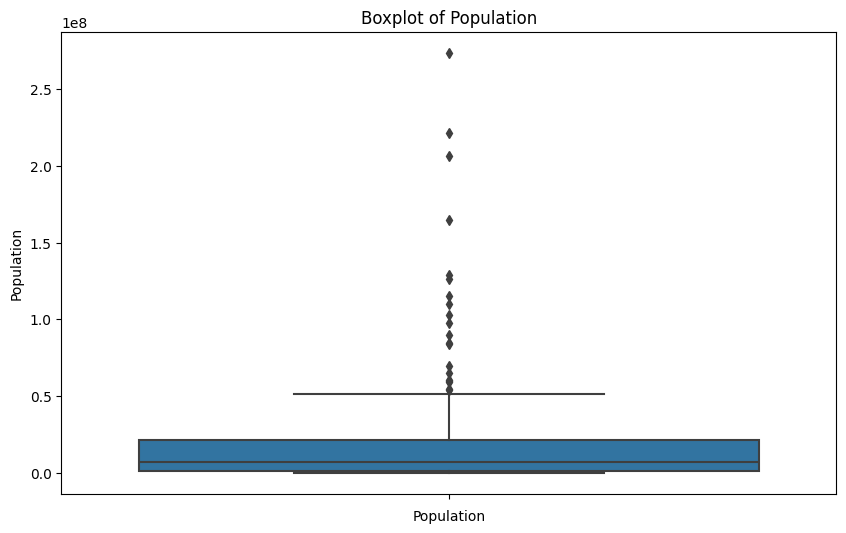

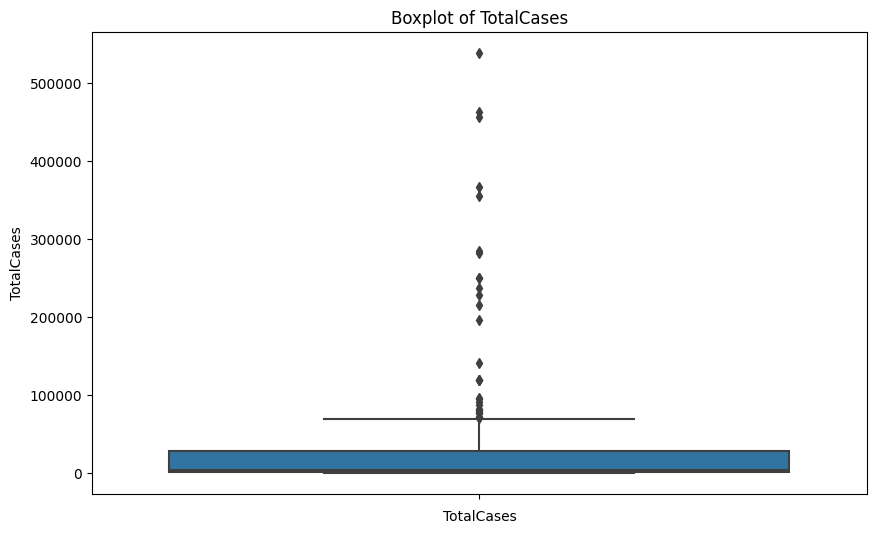

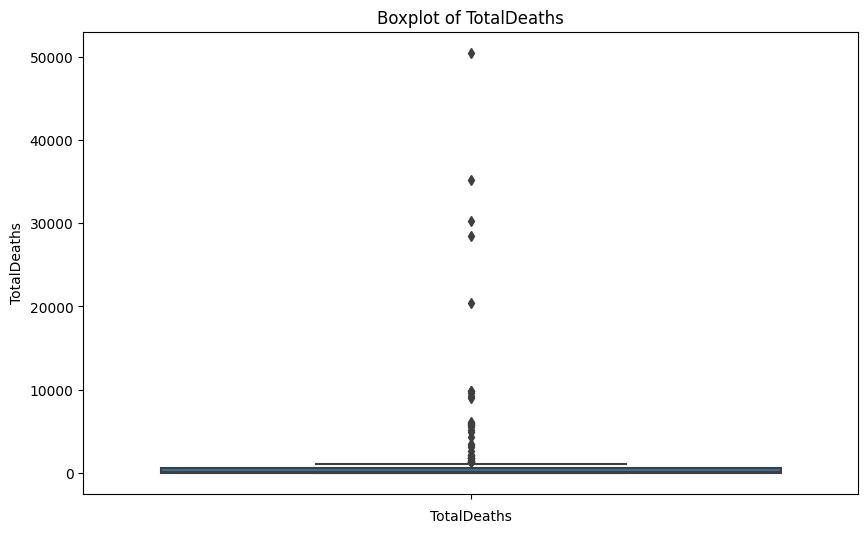

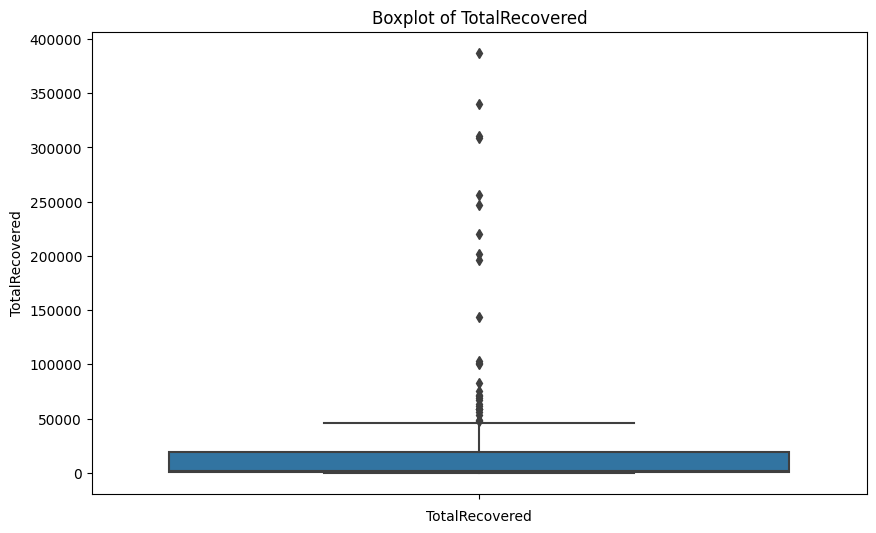

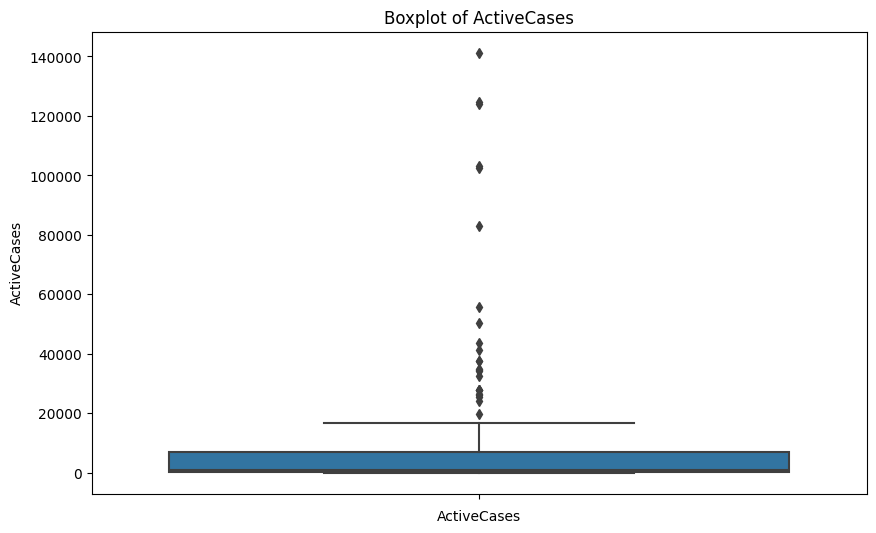

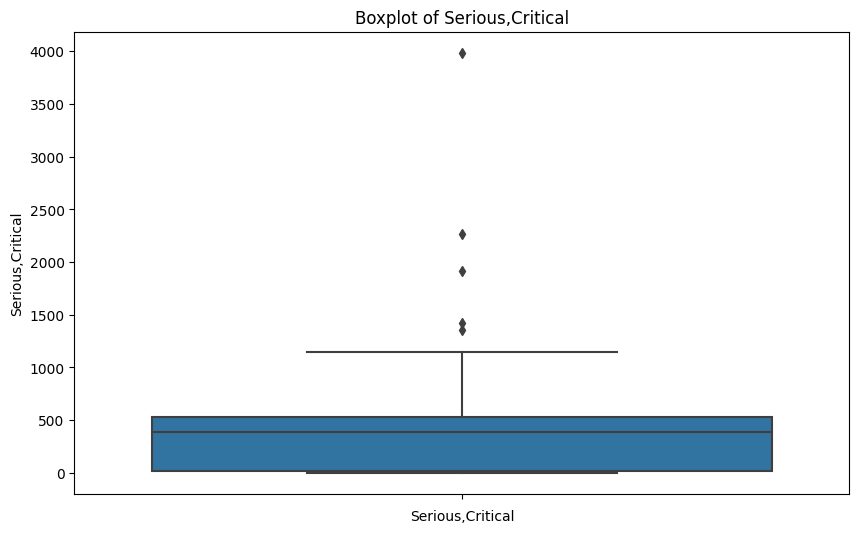

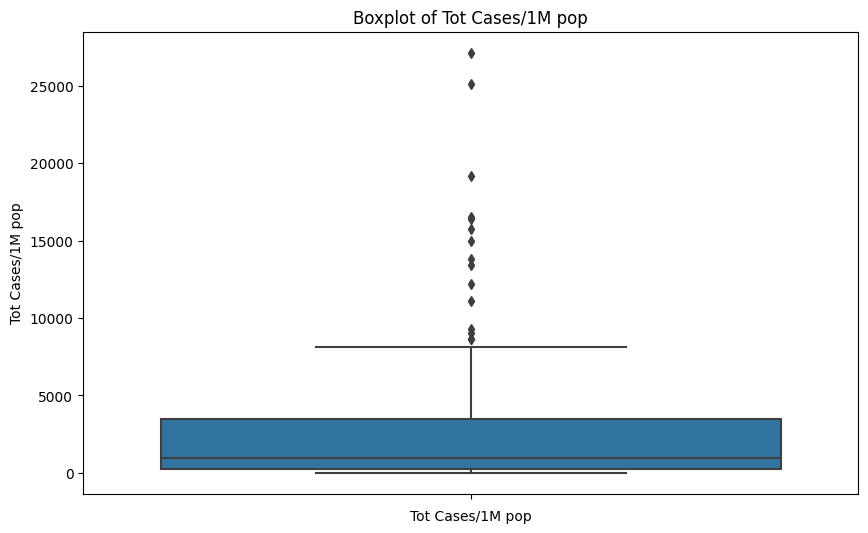

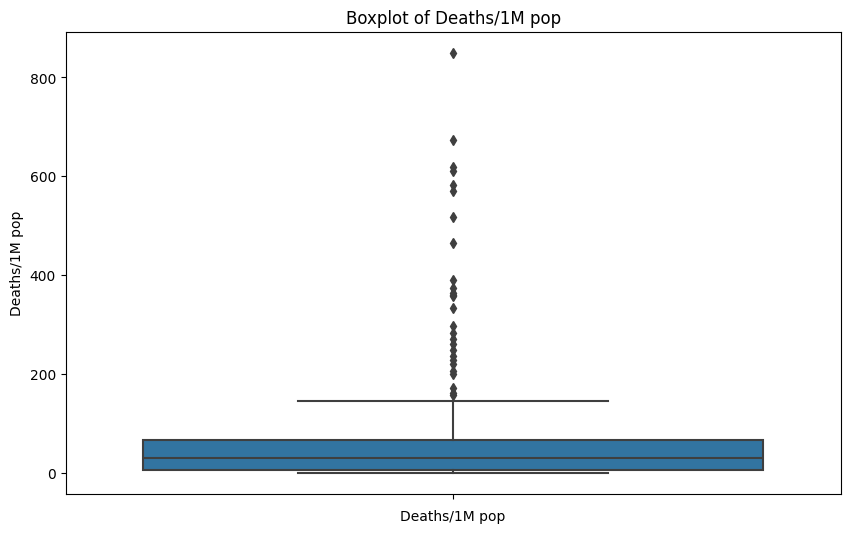

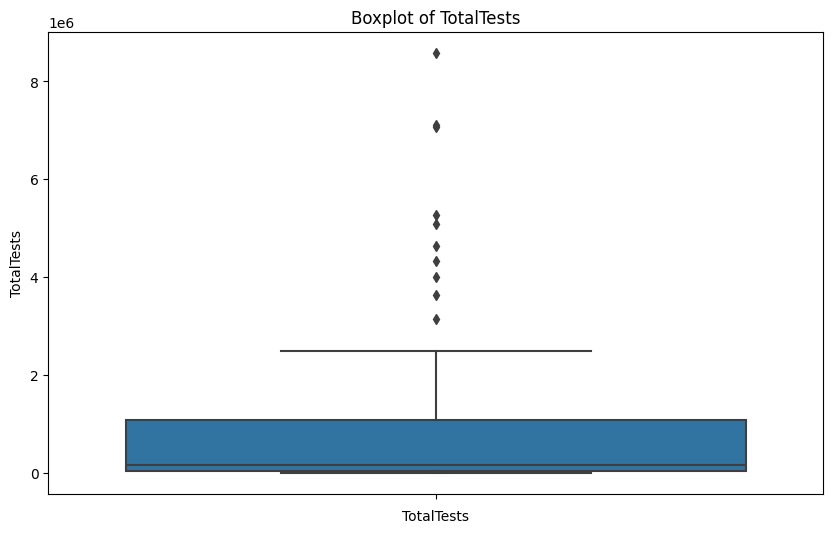

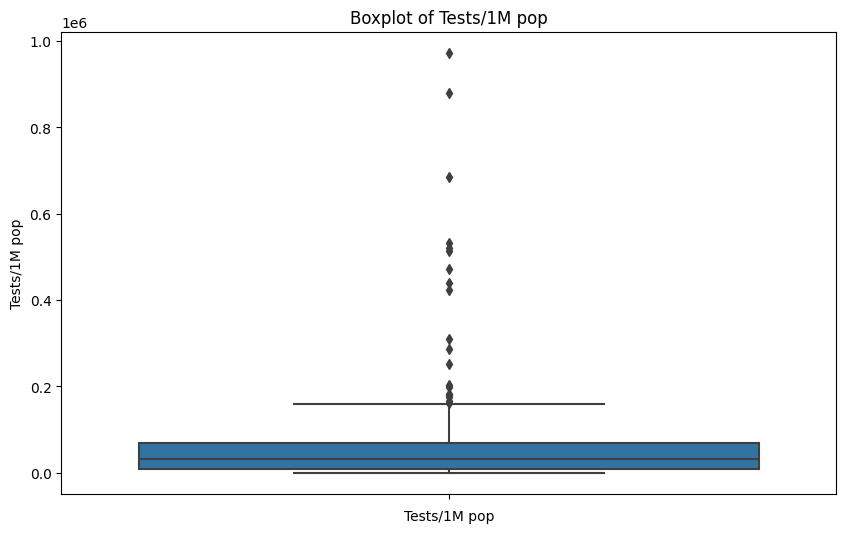

In [33]:
#Checking outliers

plt.figure(figsize=(12, 8))
for col in numerical_1:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df_10[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

######  Descriptive Analysis

In [34]:
df_cleaned = df_10.copy()

In [35]:
#categorical Columns
df_cleaned.describe(include = 'object')

,Country/Region,Continent,WHO Region
count,199,199,199
unique,199,6,6
top,South Africa,Africa,Europe
freq,1,58,76


In [36]:
#numeriacl columns
df_cleaned.describe()

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,1.990000e+02,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,1.990000e+02,199.000000
mean,2.049858e+07,36262.798995,1613.170854,25043.718593,8645.804020,338.964824,2724.984925,77.281407,7.126614e+05,72713.562814
std,3.781316e+07,83615.095408,5612.176285,60553.922463,21281.331067,420.682627,4229.261907,137.371028,1.266005e+06,133694.416822
min,8.010000e+02,10.000000,1.000000,7.000000,0.000000,1.000000,3.000000,0.000000,6.100000e+01,4.000000
25%,9.432410e+05,634.000000,25.500000,311.500000,83.000000,17.500000,269.000000,6.500000,2.948150e+04,9369.000000
50%,6.880353e+06,3546.000000,113.000000,2010.000000,858.000000,384.000000,927.000000,29.000000,1.496930e+05,32585.000000
75%,2.118861e+07,27823.500000,510.500000,18983.500000,6805.000000,534.000000,3459.500000,66.500000,1.068388e+06,69459.000000
max,2.738084e+08,538184.000000,50517.000000,387316.000000,141264.000000,3987.000000,27146.000000,850.000000,8.586648e+06,972982.000000


###### Exploratory Data Analysis

* Country/Region with the most Cases,and deaths

In [37]:
# Countries with the highest population
country_Pop = df_cleaned.groupby('Country/Region')['Population'].sum().sort_values(ascending = False).to_frame().head(20)
country_Pop

,Population
Country/Region,
Indonesia,273808365
Pakistan,221295851
Nigeria,206606300
Bangladesh,164851401
Mexico,129066160
Japan,126435859
Ethiopia,115223736
Philippines,109722719
Egypt,102516525


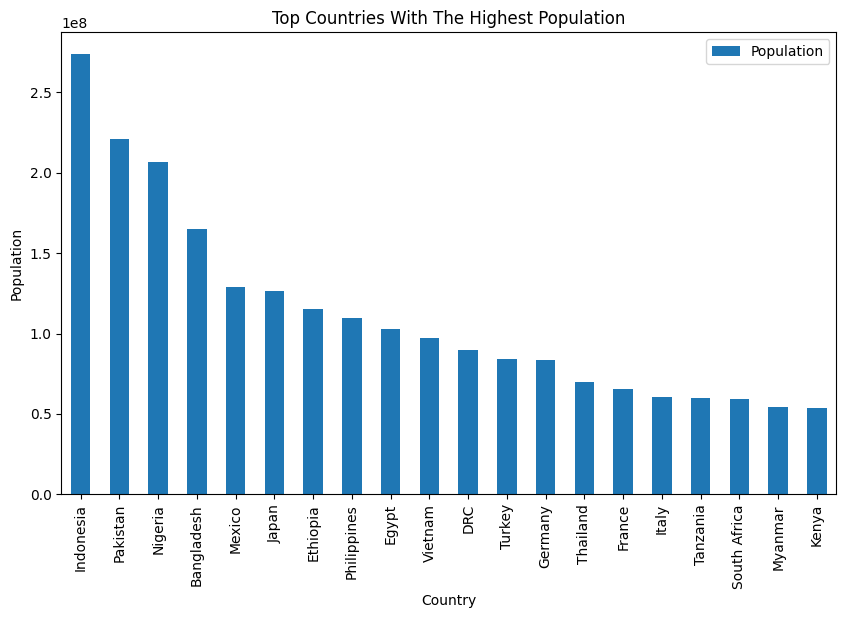

In [146]:
#Visualization
country_Pop.plot(kind = 'bar',figsize = (10,6))
plt.title('Top Countries With The Highest Population')
plt.xlabel('Country')
plt.ylabel('Population')
plt.show()

* Indonesia has the highest population

In [39]:
# Countries with the least population
country_Pop_least = df_cleaned.groupby('Country/Region')['Population'].sum().sort_values(ascending = False).to_frame().tail(20)
country_Pop_least

,Population
Country/Region,
Seychelles,98408
Antigua and Barbuda,98010
Isle of Man,85078
Andorra,77278
Dominica,72004
Cayman Islands,65798
Bermuda,62254
Greenland,56780
Saint Kitts and Nevis,53237


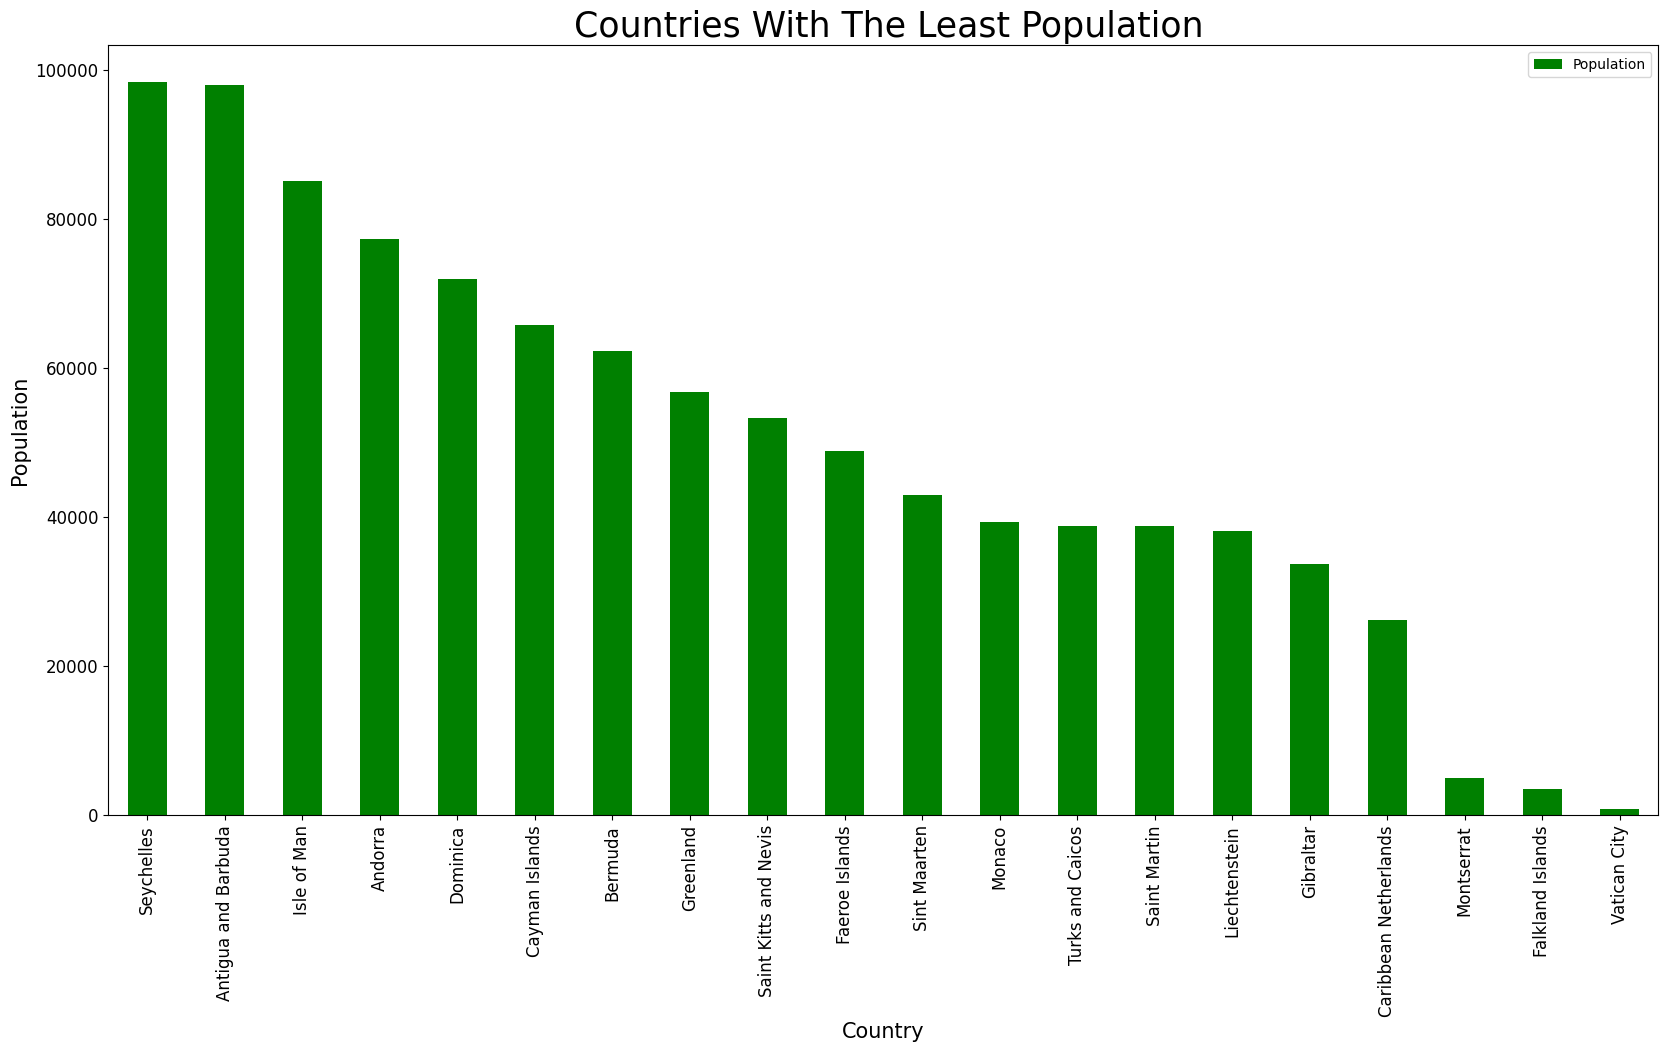

In [40]:
#Visualization
country_Pop_least.plot(kind = 'bar',figsize = (20,10),fontsize = 12, color = 'green')
plt.title(' Countries With The Least Population', size = 25)
plt.xlabel('Country',size = 15)
plt.ylabel('Population', size = 15)
plt.show()

* Vatican City has the least population

In [41]:
# Countries with the highest Number Of Cases

country_cases = df_cleaned.groupby('Country/Region')['TotalCases'].sum().sort_values(ascending = False).to_frame().head(20)
country_cases

,TotalCases
Country/Region,
South Africa,538184
Mexico,462690
Peru,455409
Chile,366671
Spain,354530
Saudi Arabia,284226
Pakistan,281863
Bangladesh,249651
Italy,249204


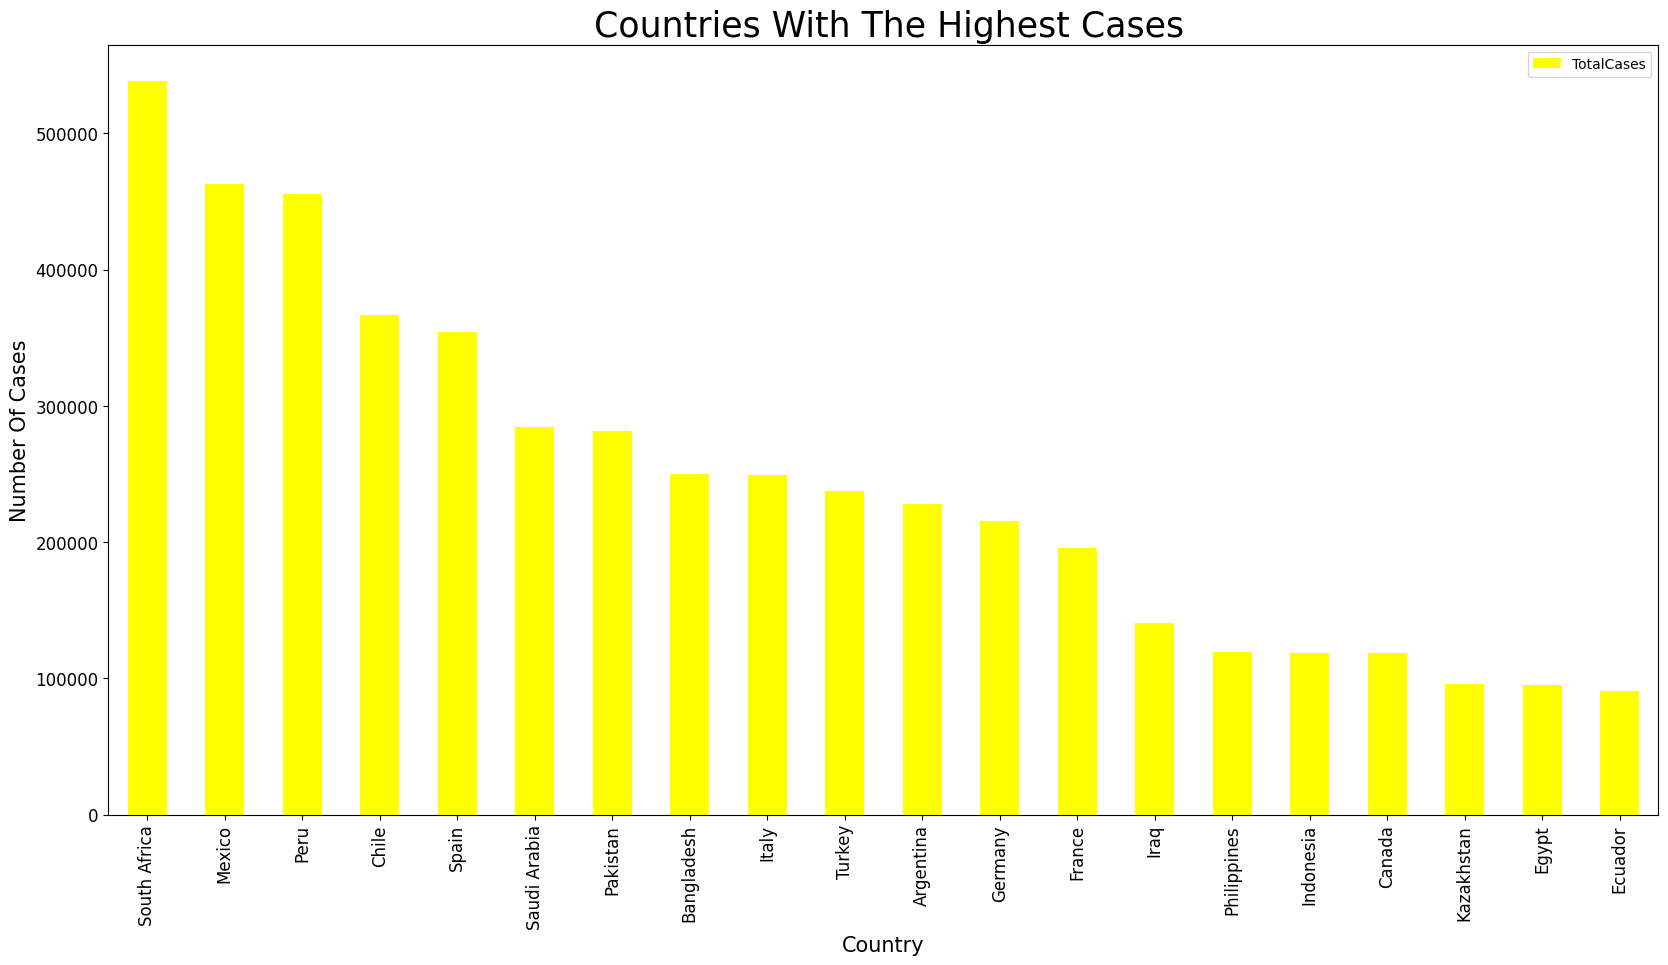

In [42]:
#Visualization
country_cases.plot(kind = 'bar',figsize = (20,10),fontsize = 12, color = 'yellow')
plt.title(' Countries With The Highest Cases', size = 25)
plt.xlabel('Country',size = 15)
plt.ylabel('Number Of Cases', size = 15)
plt.show()

* South Africa Has the highest number of cases

In [43]:
#Countries with the least number of cases

country_cases_least = df_cleaned.groupby('Country/Region')['TotalCases'].sum().sort_values(ascending = False).to_frame().tail(20)
country_cases_least

,TotalCases
Country/Region,
Belize,86
French Polynesia,64
St. Vincent Grenadines,56
Saint Martin,53
Macao,46
Curaçao,31
Fiji,27
Timor-Leste,25
Saint Lucia,25


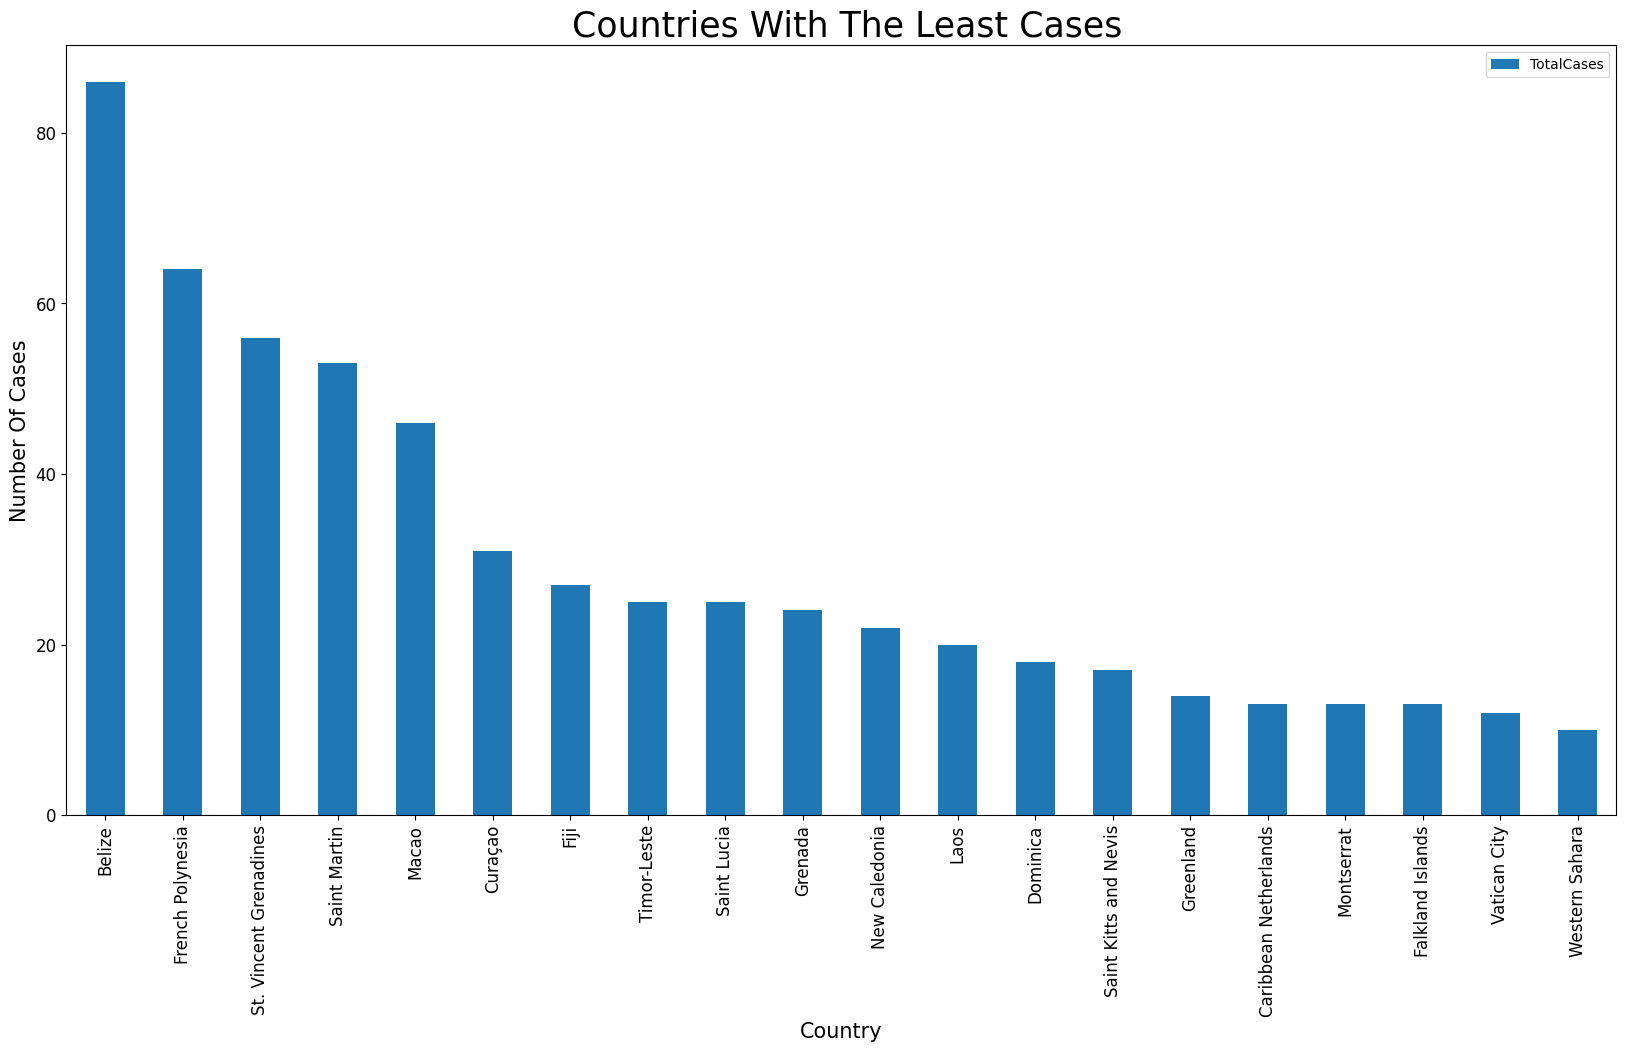

In [44]:
#Visualization
country_cases_least.plot(kind = 'bar',figsize = (20,10),fontsize = 12)
plt.title(' Countries With The Least Cases', size = 25)
plt.xlabel('Country',size = 15)
plt.ylabel('Number Of Cases', size = 15)
plt.show()

* Western Sahara has the least cases

In [45]:
#Countries with the highest dead cases

country_death = df_cleaned.groupby('Country/Region')['TotalDeaths'].sum().sort_values(ascending = False).to_frame().head(20)
country_death

,TotalDeaths
Country/Region,
Mexico,50517
Italy,35187
France,30312
Spain,28500
Peru,20424
Chile,9889
Belgium,9859
South Africa,9604
Germany,9252


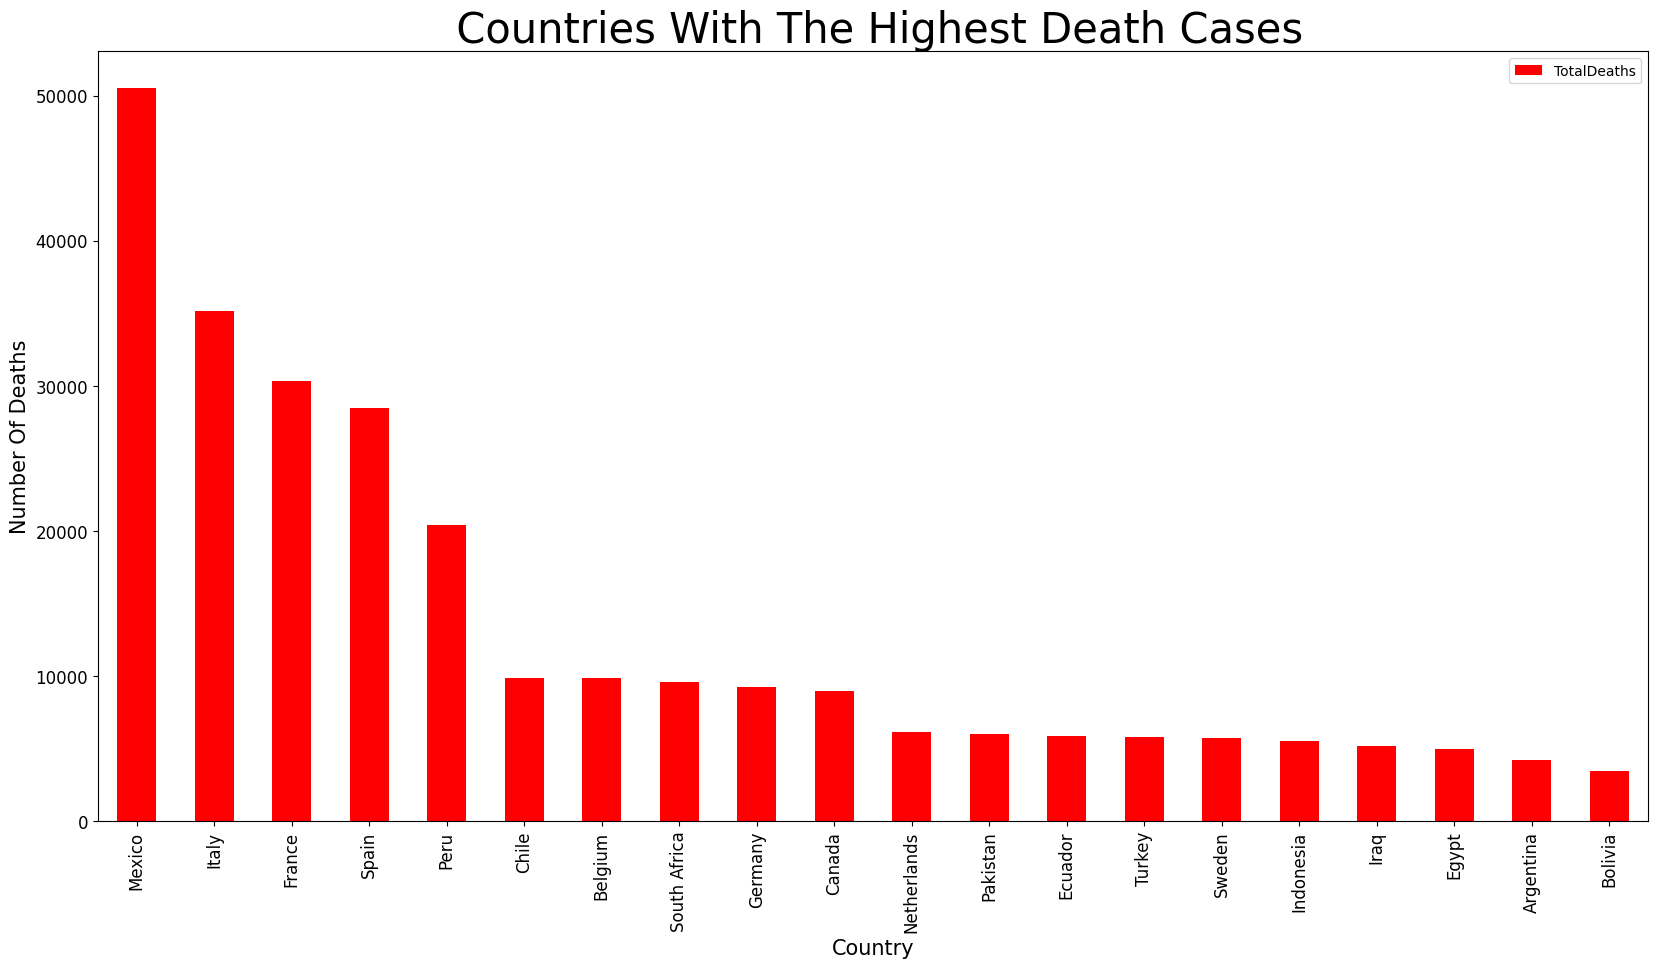

In [46]:
#Visualization
country_death.plot(kind = 'bar',figsize = (20,10),fontsize = 12, color = 'red')
plt.title(' Countries With The Highest Death Cases', size = 30)
plt.xlabel('Country',size = 15)
plt.ylabel('Number Of Deaths', size = 15)
plt.show()

* Mexico has the recorded the highest number of death cases

In [47]:
#Countries with the laest death cases

country_death_least = df_cleaned.groupby('Country/Region')['TotalDeaths'].sum().sort_values(ascending = False).to_frame().tail(20)
country_death_least

,TotalDeaths
Country/Region,
Myanmar,6
Rwanda,5
Uganda,5
Réunion,5
Monaco,4
Antigua and Barbuda,3
Papua New Guinea,3
Brunei,3
Aruba,3


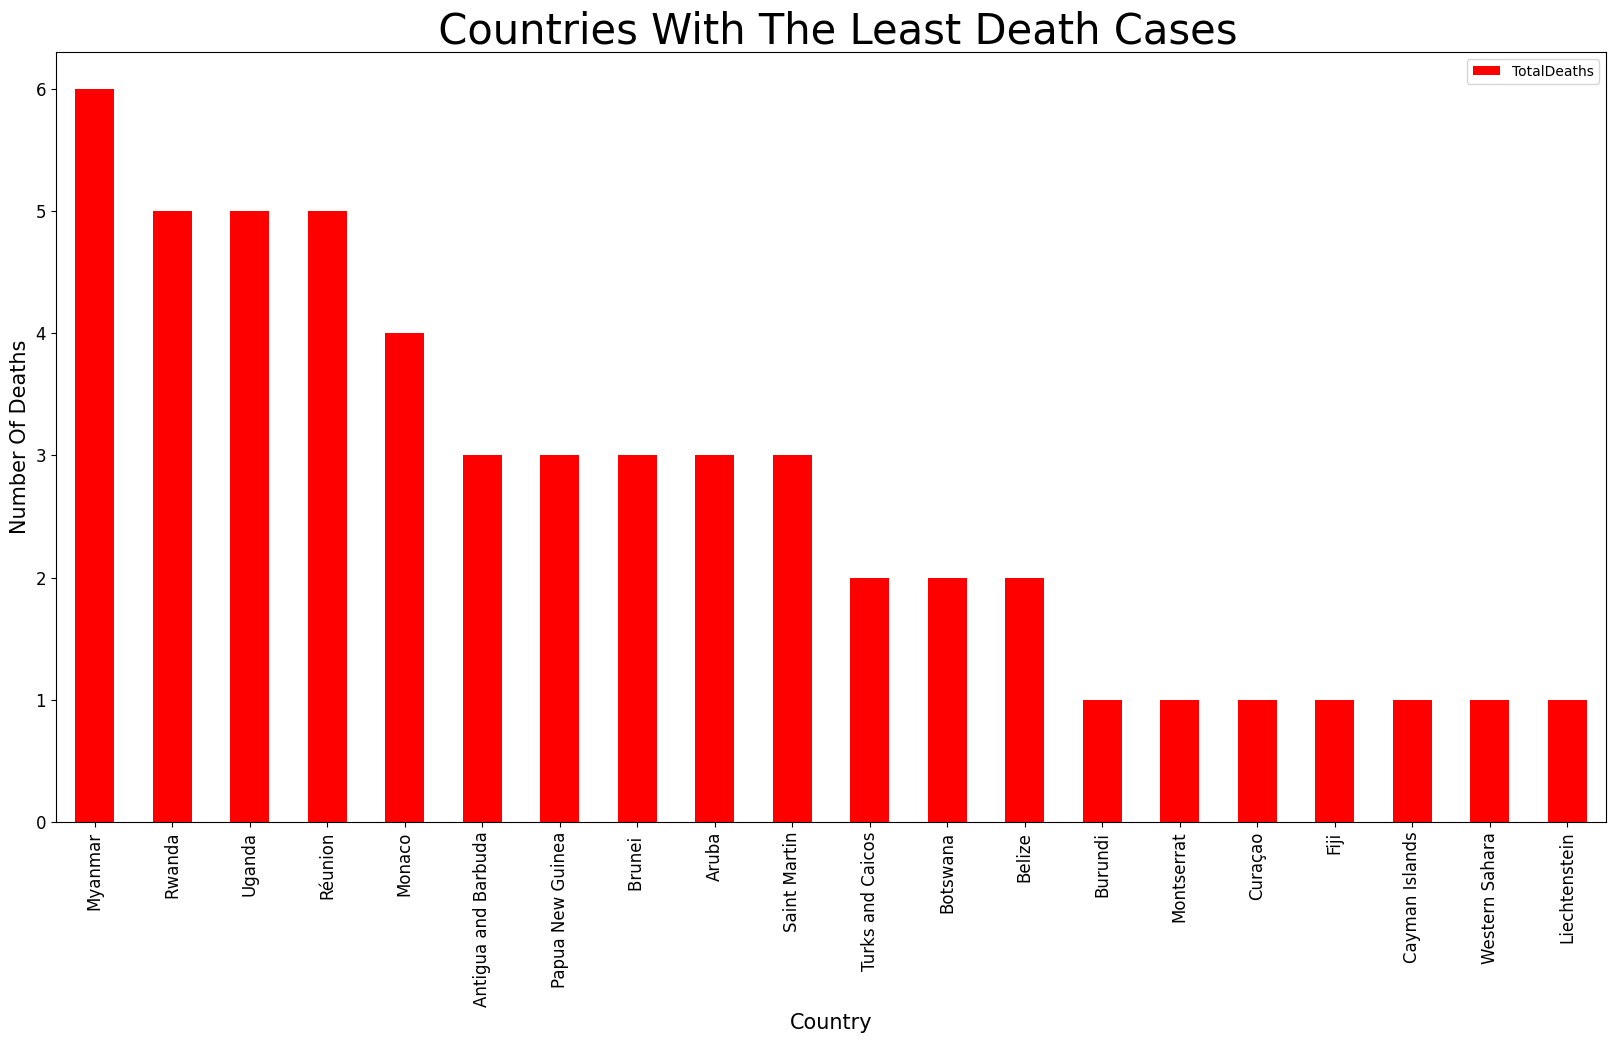

In [48]:
#Visualization
country_death_least.plot(kind = 'bar',figsize = (20,10),fontsize = 12, color = 'red')
plt.title(' Countries With The Least Death Cases', size = 30)
plt.xlabel('Country',size = 15)
plt.ylabel('Number Of Deaths', size = 15)
plt.show()

* Burundi, Curacau, Fiji, Cayman Island, western sahara, Liechtenstein recorded the least number of deaths.

In [49]:
#Number recovered

country_recovered = df_cleaned.groupby('Country/Region')['TotalRecovered'].sum().sort_values(ascending = False).to_frame().head(20)
country_recovered

,TotalRecovered
Country/Region,
South Africa,387316
Chile,340168
Peru,310337
Mexico,308848
Pakistan,256058
Saudi Arabia,247089
Turkey,220546
Italy,201323
Germany,196200


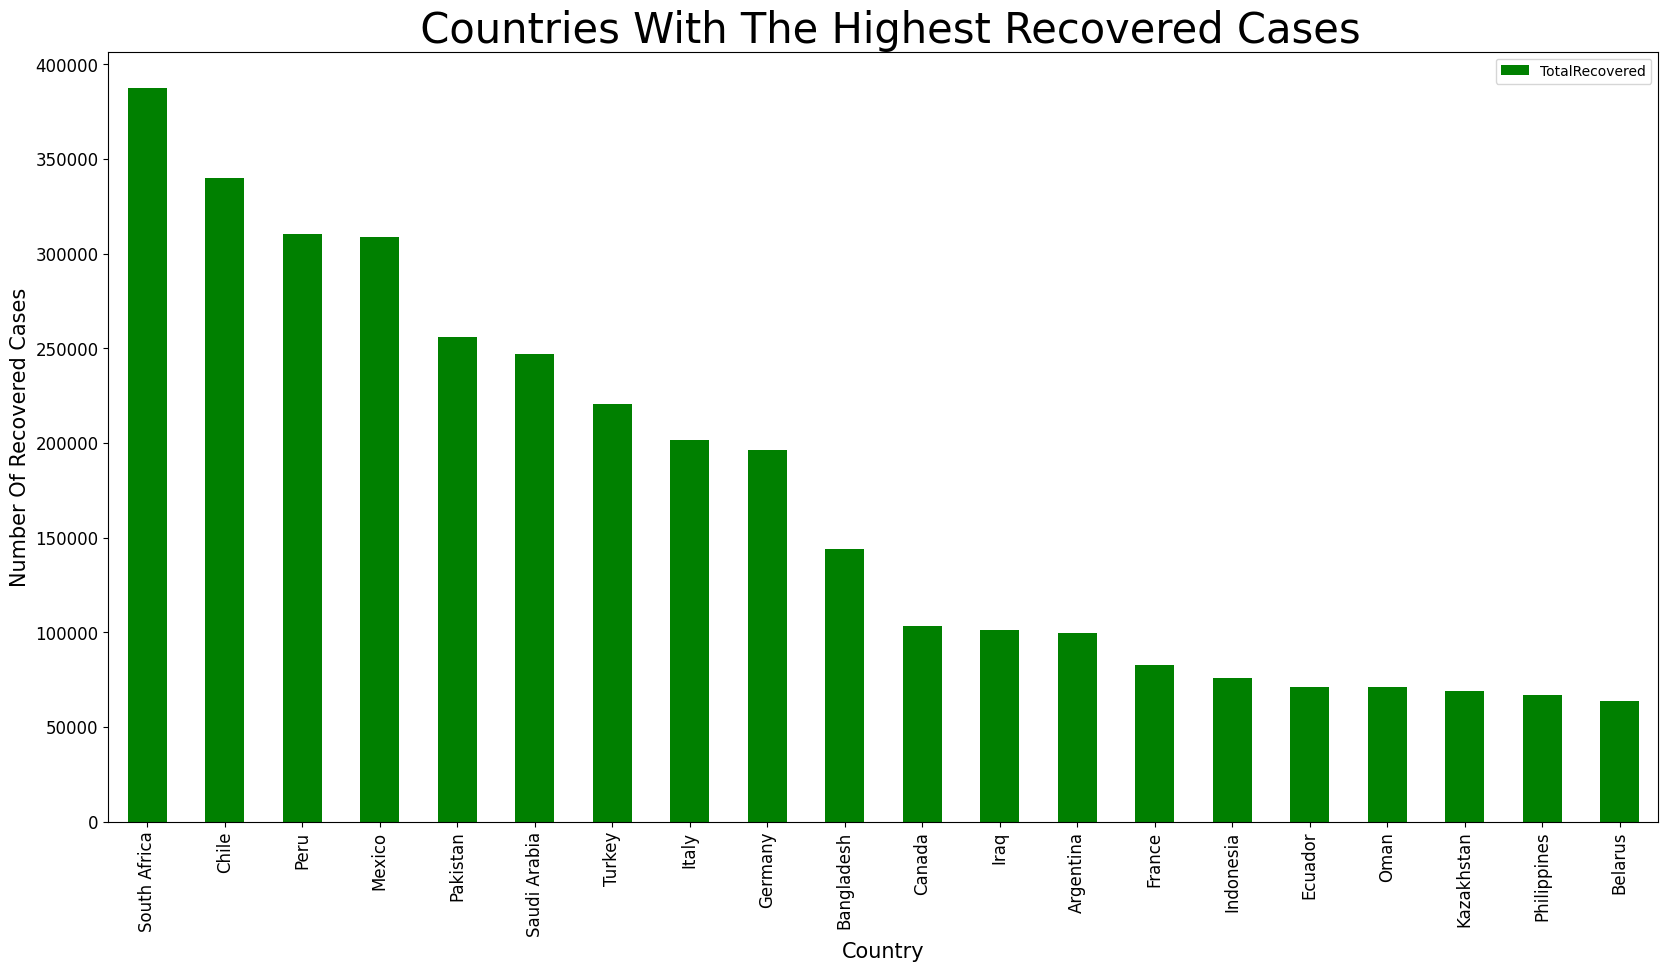

In [50]:
#Visualization
country_recovered.plot(kind = 'bar',figsize = (20,10),fontsize = 12, color = 'green')
plt.title(' Countries With The Highest Recovered Cases', size = 30)
plt.xlabel('Country',size = 15)
plt.ylabel('Number Of Recovered Cases', size = 15)
plt.show()

* South Africa has the highest number of recovered cases

In [51]:
#Number recovered

country_recovered_least = df_cleaned.groupby('Country/Region')['TotalRecovered'].sum().sort_values(ascending = False).to_frame().tail(20)
country_recovered_least

,TotalRecovered
Country/Region,
Macao,46
St. Vincent Grenadines,46
Saint Martin,41
Turks and Caicos,39
Belize,31
Curaçao,28
Saint Lucia,24
Timor-Leste,24
Grenada,23


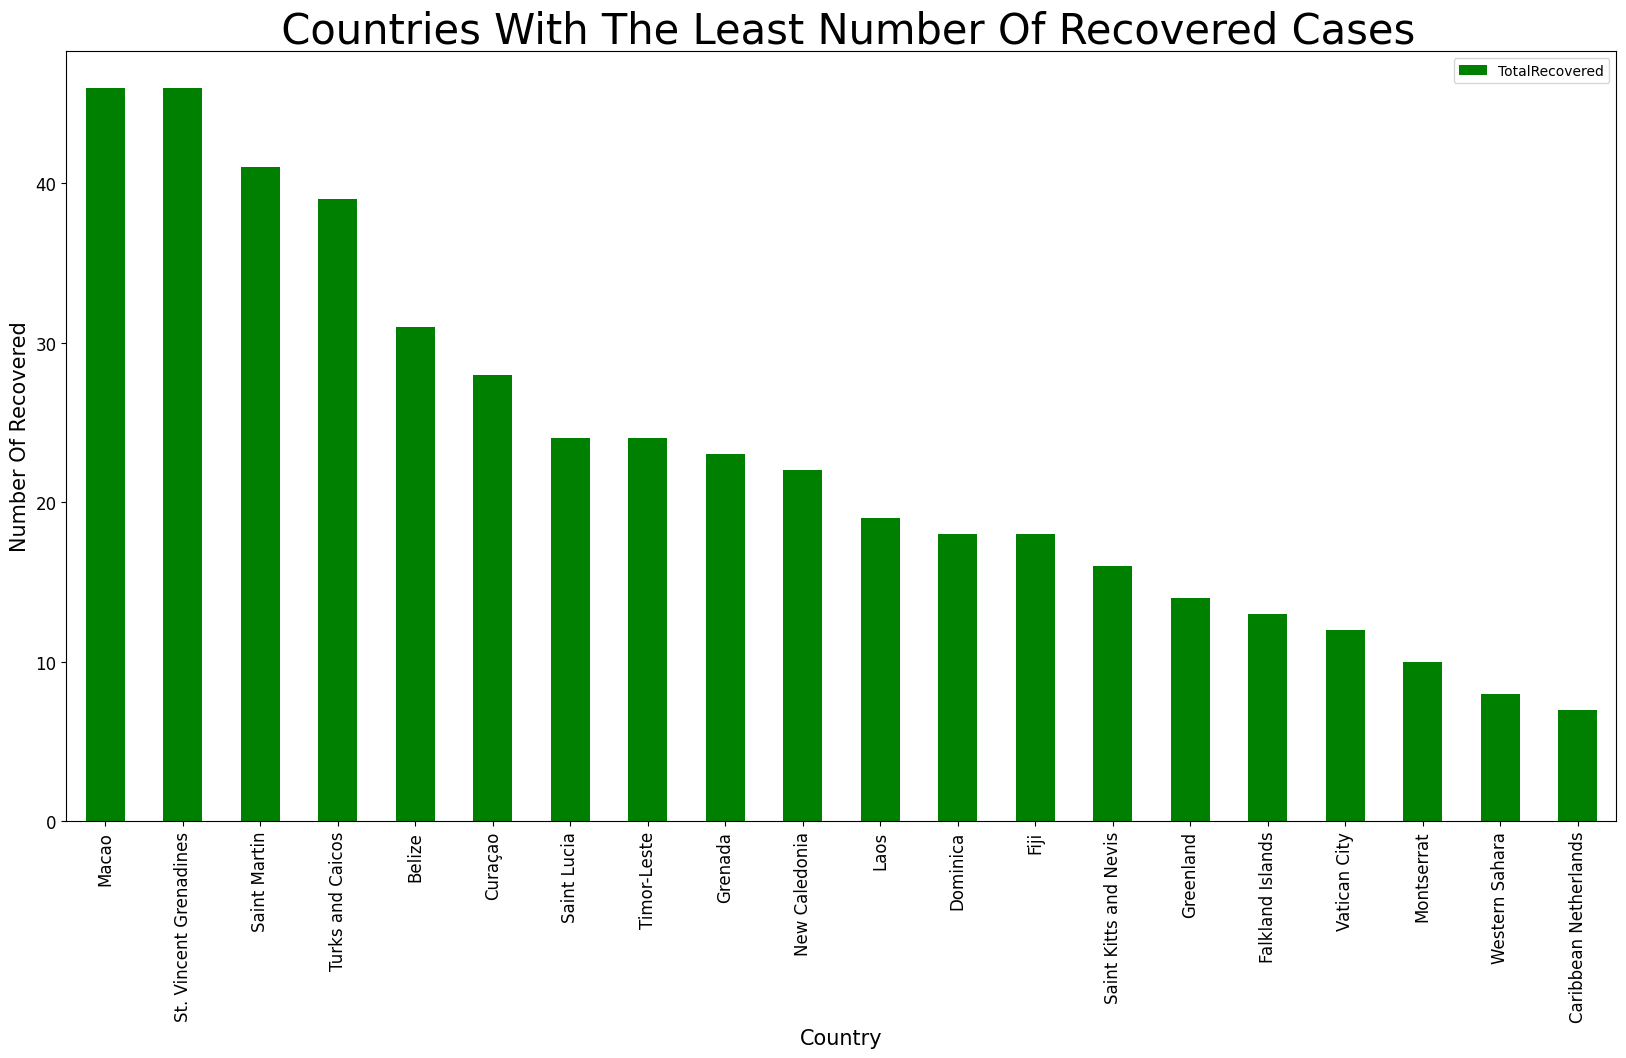

In [52]:
#Visualization
country_recovered_least.plot(kind = 'bar',figsize = (20,10),fontsize = 12, color = 'green')
plt.title(' Countries With The Least Number Of Recovered Cases', size = 30)
plt.xlabel('Country',size = 15)
plt.ylabel('Number Of Recovered', size = 15)
plt.show()

* Caribbean Netherlands has the least number of recovered cases

In [53]:
#ActiveCases
#Countries With The highest active cases
country_activecases = df_cleaned.groupby('Country/Region')['ActiveCases'].sum().sort_values(ascending = False).to_frame().head(20)
country_activecases

,ActiveCases
Country/Region,
South Africa,141264
Peru,124648
Argentina,124092
Mexico,103325
Bangladesh,102521
France,82861
Bolivia,55585
Philippines,50473
Belgium,43638


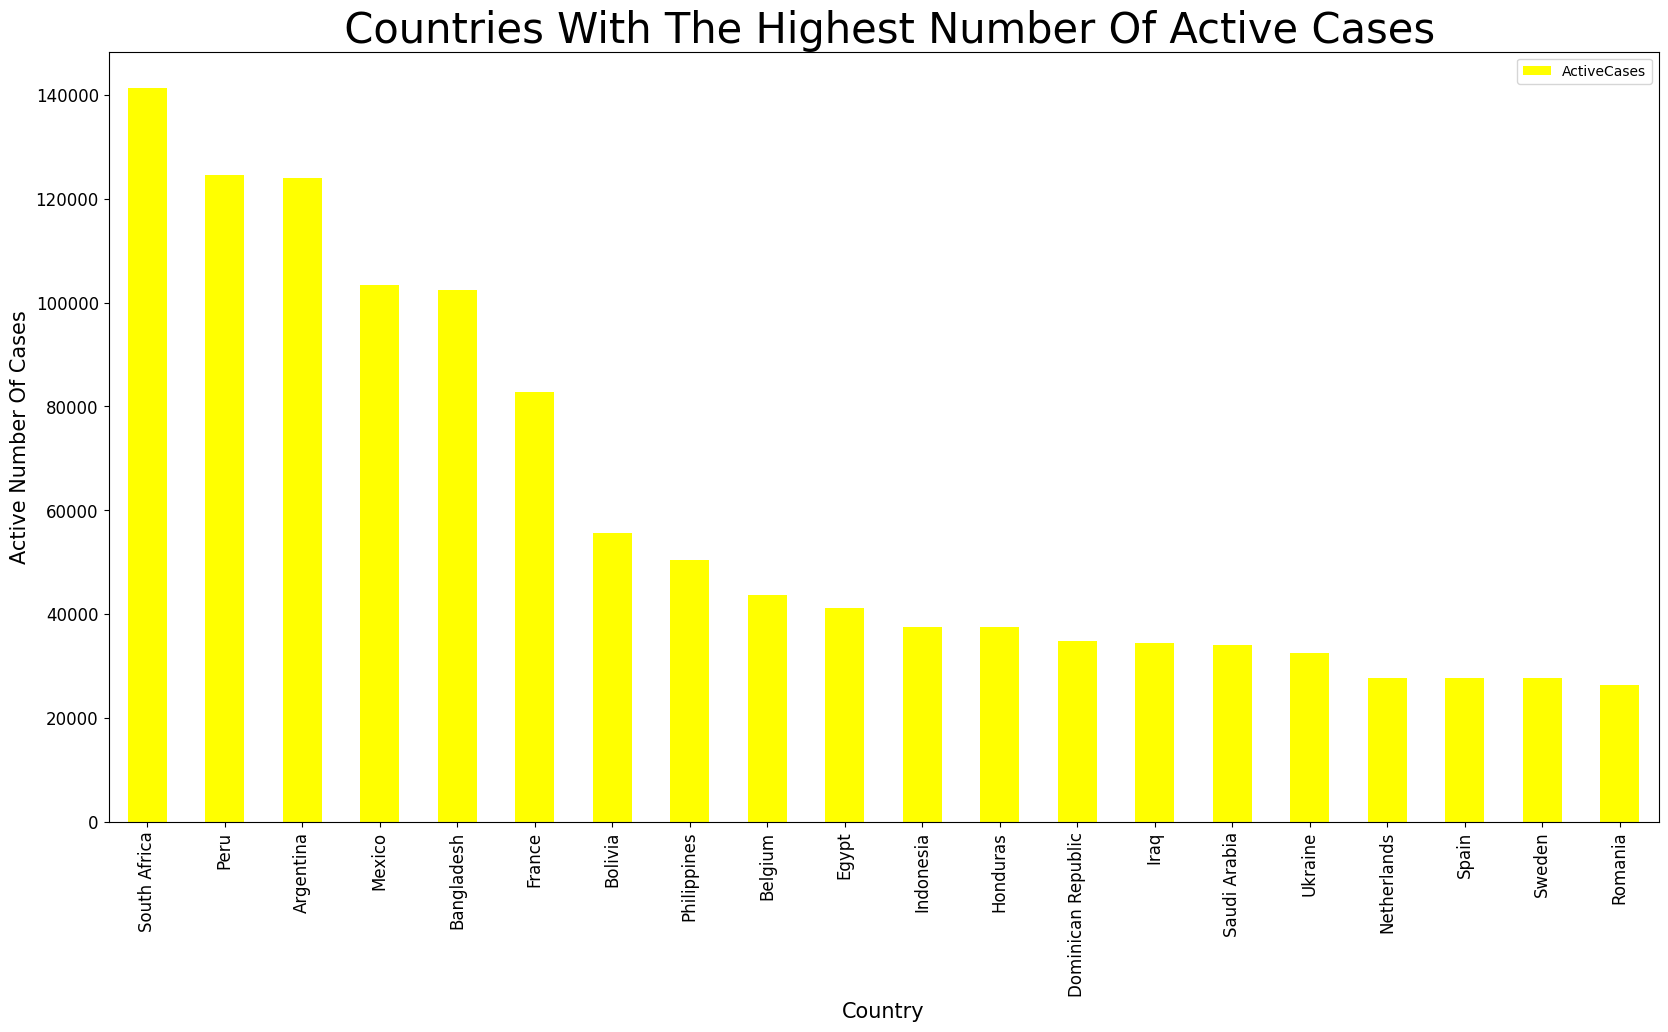

In [54]:
#Visualization
country_activecases.plot(kind = 'bar',figsize = (20,10),fontsize = 12, color = 'yellow')
plt.title(' Countries With The Highest Number Of Active Cases', size = 30)
plt.xlabel('Country',size = 15)
plt.ylabel('Active Number Of Cases', size = 15)
plt.show()

* South Africa has the highest number of active cases

In [55]:
#country.region with the least number of active cases

country_activecases_least = df_cleaned.groupby('Country/Region')['ActiveCases'].sum().sort_values(ascending = False).to_frame().tail(20)
country_activecases_least

,ActiveCases
Country/Region,
Seychelles,2
Montserrat,2
Curaçao,2
French Polynesia,2
Saint Kitts and Nevis,1
Timor-Leste,1
Grenada,1
Western Sahara,1
Laos,1


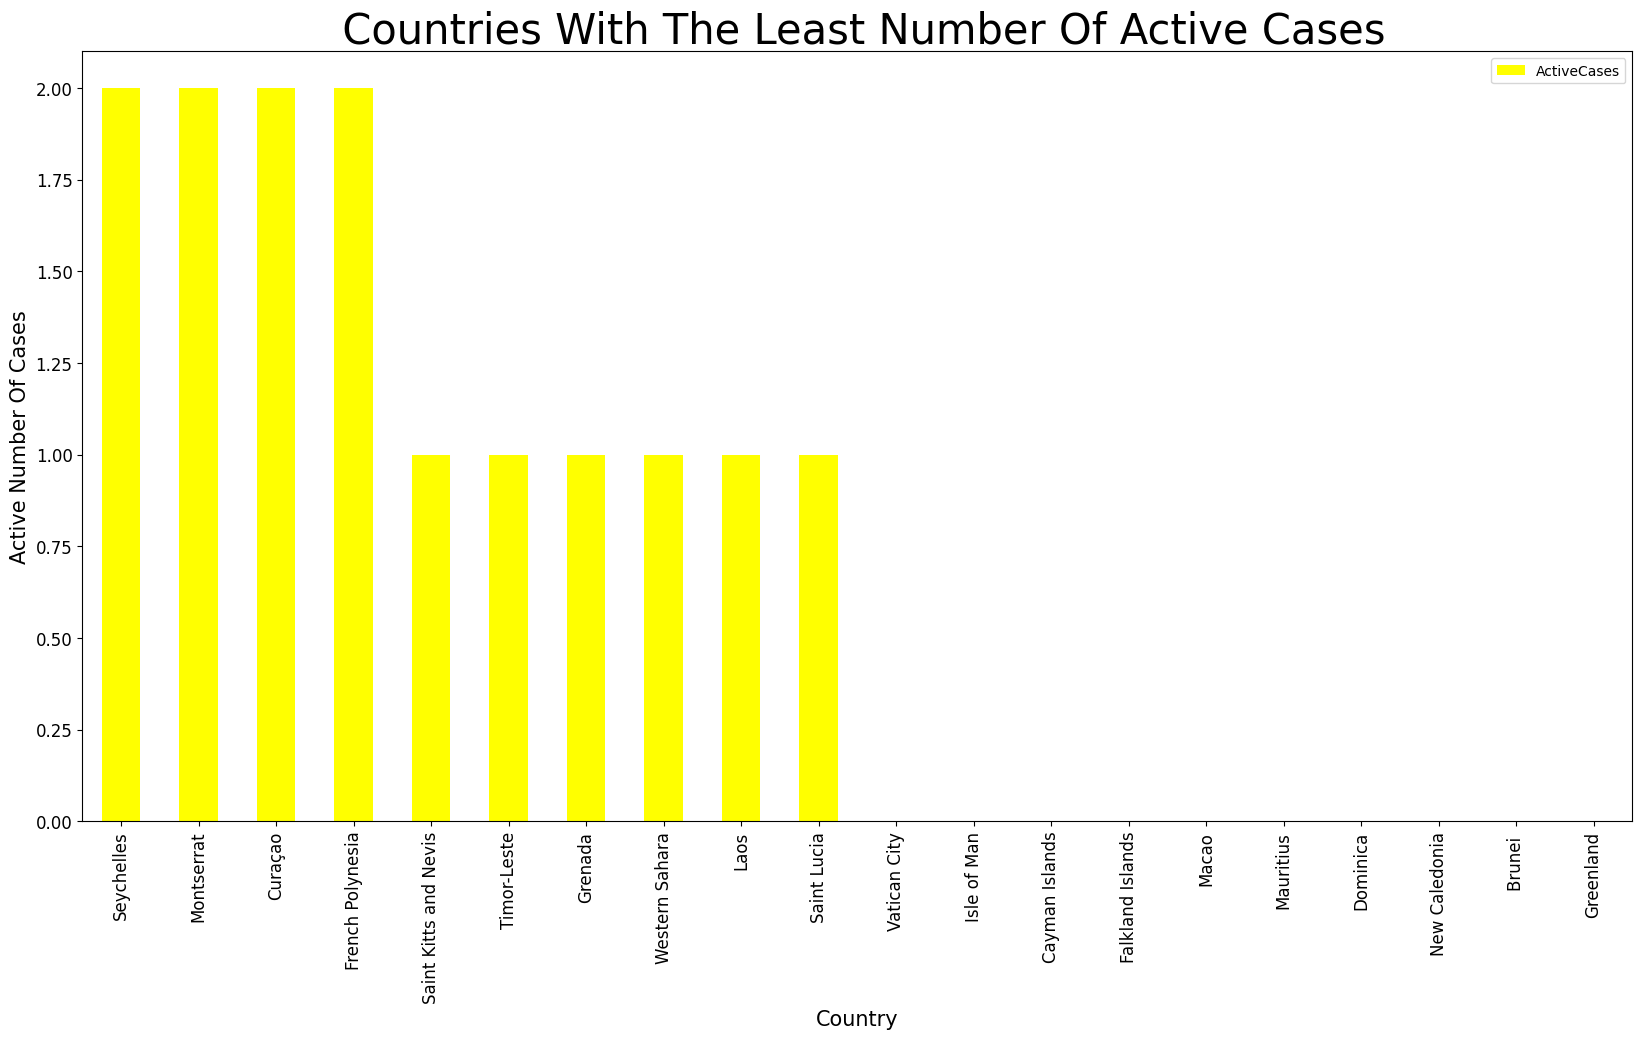

In [56]:
#Visualization
country_activecases_least.plot(kind = 'bar',figsize = (20,10),fontsize = 12, color = 'yellow')
plt.title(' Countries With The Least Number Of Active Cases', size = 30)
plt.xlabel('Country',size = 15)
plt.ylabel('Active Number Of Cases', size = 15)
plt.show()

* Saint Kittis and Nevis,Timor-Leste,Grenada, Western Sahara, Laos and Saint Lucia has the least number of active Cases

###### Continent 

In [57]:
#continent info

df_cleaned['Continent'].unique()

array(['Africa', 'North America', 'South America', 'Europe', 'Asia',
       'Australia/Oceania'], dtype=object)

In [58]:
#Number of countries per each continent
continent_countries = df_cleaned['Continent'].value_counts()
continent_countries

Continent
Africa               58
Asia                 45
Europe               44
North America        34
South America        12
Australia/Oceania     6
Name: count, dtype: int64

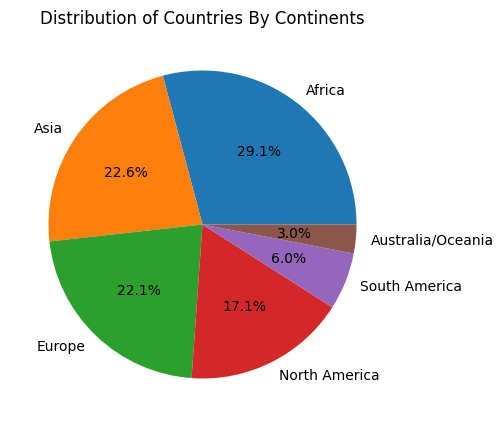

In [147]:
#Visualizations
# Visualizationze
plt.figure(figsize = (10,5))
plt.pie(continent_countries, labels=continent_countries.index, autopct='%1.1f%%')
plt.title('Distribution of Countries By Continents')
plt.show()


* Africa has the highest number of countries while Oceania has the least

In [60]:
#Continenets with the highest Population

cont_pop = df_cleaned.groupby('Continent')['Population'].sum().sort_values(ascending = False)
cont_pop

Continent
Asia                 1705405990
Africa               1373930975
Europe                533153703
North America         258305337
South America         167463510
Australia/Oceania      40957909
Name: Population, dtype: int32

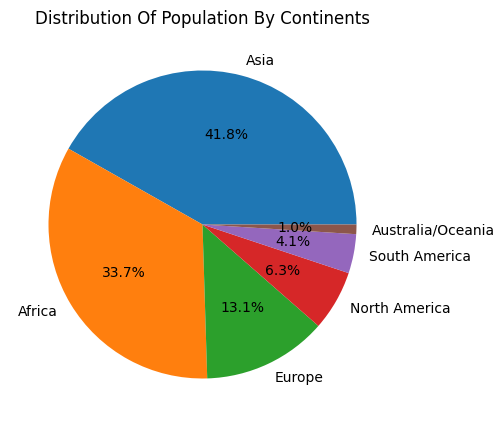

In [148]:
# Visualizationze
plt.figure(figsize = (10,5))
plt.pie(cont_pop, labels=cont_pop.index, autopct='%1.1f%%')
plt.title('Distribution Of Population By Continents')
plt.show()


* Asia has the largest population while Oceania has the least

In [62]:
#Continents And Total Number Of Cases

cont_cases = df_cleaned.groupby('Continent')['TotalCases'].sum().sort_values(ascending = False)
cont_cases

Continent
Asia                 2232176
Europe               1794776
South America        1268001
Africa               1012579
North America         887030
Australia/Oceania      21735
Name: TotalCases, dtype: int64

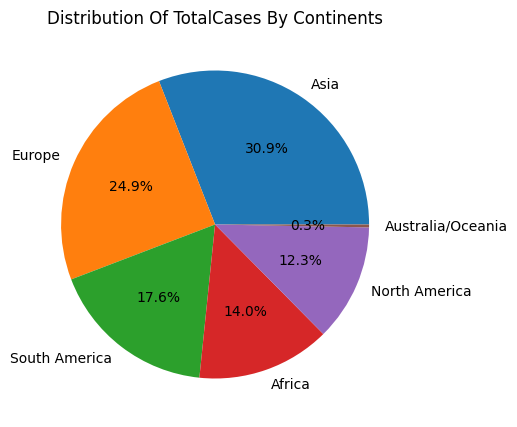

In [149]:
# Visualizationze
plt.figure(figsize = (10,5))
plt.pie(cont_cases, labels=cont_cases.index, autopct='%1.1f%%')
plt.title('Distribution Of TotalCases By Continents')
plt.show()

* Asia has the highest Cases

In [64]:
#Death Cases Accross continents

cont_death = df_cleaned.groupby('Continent')['TotalDeaths'].sum().sort_values(ascending = False)
cont_death

Continent
Europe               144391
North America         67842
South America         44415
Asia                  41513
Africa                22353
Australia/Oceania       507
Name: TotalDeaths, dtype: int32

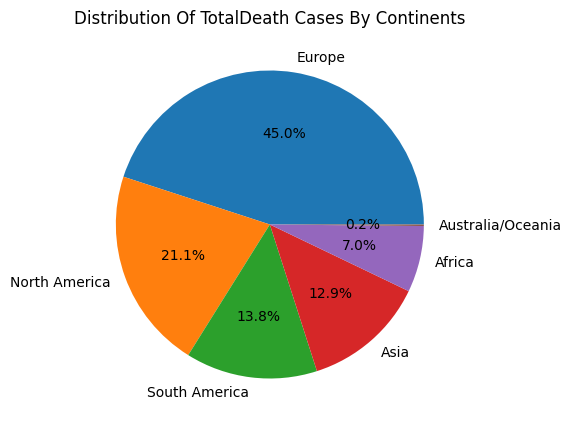

In [150]:
# Visualizationze
plt.figure(figsize = (10,5))
plt.pie(cont_death, labels=cont_death.index, autopct='%1.1f%%')
plt.title('Distribution Of TotalDeath Cases By Continents')
plt.show()

* Europe has the Highest Number of death cases

In [66]:
#Total recovered cases
cont_recovered = df_cleaned.groupby('Continent')['TotalRecovered'].sum().sort_values(ascending = False)
cont_recovered

Continent
Asia                 1744492
Europe               1081172
South America         876135
Africa                694271
North America         575010
Australia/Oceania      12620
Name: TotalRecovered, dtype: int32

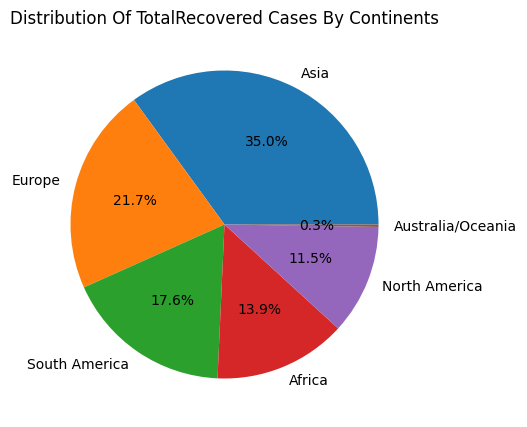

In [151]:
# Visualizationze
plt.figure(figsize = (10,5))
plt.pie(cont_recovered, labels=cont_recovered.index, autopct='%1.1f%%')
plt.title('Distribution Of TotalRecovered Cases By Continents')
plt.show()

* Asia has the highest number of recovered cases

###### Who/Region

In [68]:
#population by region

who = df_cleaned.groupby('WHO Region')['Population'].sum()
who

WHO Region
Africa                  1118461393
Americas                 424034420
EasternMediterranean     645102262
Europe                   753306888
South-EastAsia           616167600
WesternPacific           522144861
Name: Population, dtype: int32

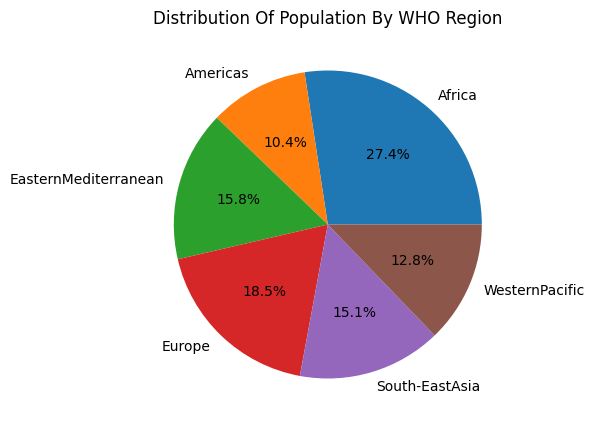

In [152]:
# Visualizationze
plt.figure(figsize = (10,5))
plt.pie(who, labels=who.index, autopct='%1.1f%%')
plt.title('Distribution Of Population By WHO Region')
plt.show()

* Africa has the highest population by WHO Region

In [70]:
#Total cases by WHO Region

who_cases = df_cleaned.groupby('WHO Region')['TotalCases'].sum()
who_cases

WHO Region
Africa                   852026
Americas                2145401
EasternMediterranean    1173657
Europe                  2376609
South-EastAsia           401490
WesternPacific           267114
Name: TotalCases, dtype: int64

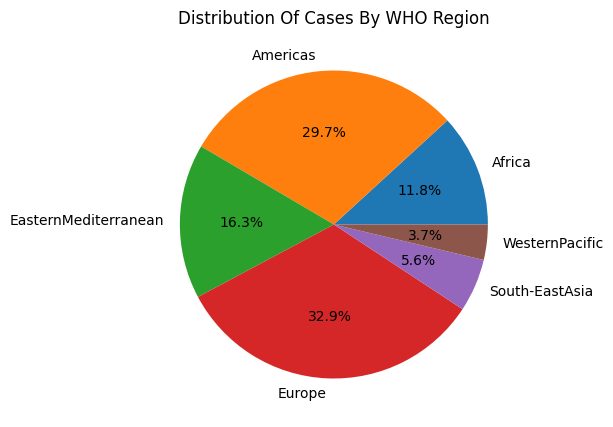

In [154]:
#Visualizationze
plt.figure(figsize = (10,5))
plt.pie(who_cases, labels=who_cases.index, autopct='%1.1f%%')
plt.title('Distribution Of Cases By WHO Region')
plt.show()

* Europe has the highest cases

###### Regressional Analysis

Population And TotalCases

Text(0.5, 1.0, 'Regression Analysis')

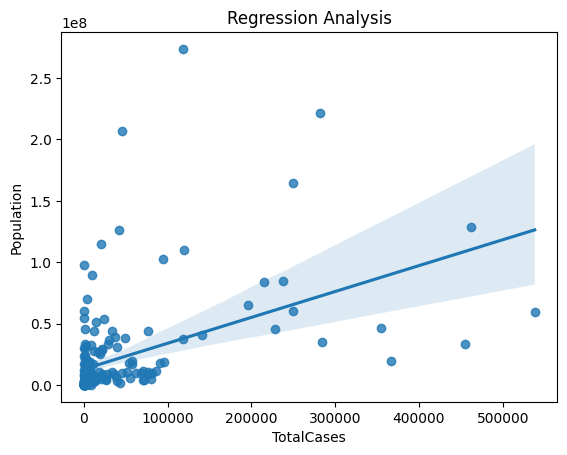

In [153]:
sns.regplot(x = 'TotalCases', y = 'Population', data = df_cleaned)
plt.title('Regression Analysis')

###### NOTE:
* The Higher the population, the higher the number of cases


<Axes: xlabel='TotalDeaths', ylabel='Population'>

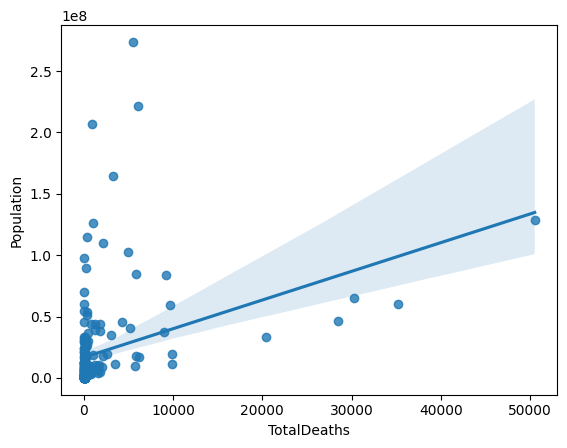

In [77]:
#population and TotalDeaths

sns.regplot(x = 'TotalDeaths', y = 'Population', data = df_cleaned)

* The higher the population, the higher the number of deathcases

###### Correlational Analysis

In [79]:
num_corr = df_cleaned.corr(numeric_only = True)
num_corr

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
Population,1.000000,0.466351,0.347005,0.450527,0.417695,0.180043,-0.122198,0.004870,0.331815,-0.168963
TotalCases,0.466351,1.000000,0.749539,0.951796,0.809993,0.490911,0.356605,0.505003,0.593893,-0.007673
TotalDeaths,0.347005,0.749539,1.000000,0.644419,0.583854,0.497976,0.177678,0.612127,0.540625,-0.006565
TotalRecovered,0.450527,0.951796,0.644419,1.000000,0.698414,0.489076,0.366254,0.428062,0.561524,0.000986
ActiveCases,0.417695,0.809993,0.583854,0.698414,1.000000,0.360622,0.251027,0.410338,0.310474,-0.064704
"Serious,Critical",0.180043,0.490911,0.497976,0.489076,0.360622,1.000000,0.067371,0.152430,0.179585,-0.005554
Tot Cases/1M pop,-0.122198,0.356605,0.177678,0.366254,0.251027,0.067371,1.000000,0.505739,0.140810,0.295393
Deaths/1M pop,0.004870,0.505003,0.612127,0.428062,0.410338,0.152430,0.505739,1.000000,0.330356,0.082535
TotalTests,0.331815,0.593893,0.540625,0.561524,0.310474,0.179585,0.140810,0.330356,1.000000,0.115147
Tests/1M pop,-0.168963,-0.007673,-0.006565,0.000986,-0.064704,-0.005554,0.295393,0.082535,0.115147,1.000000


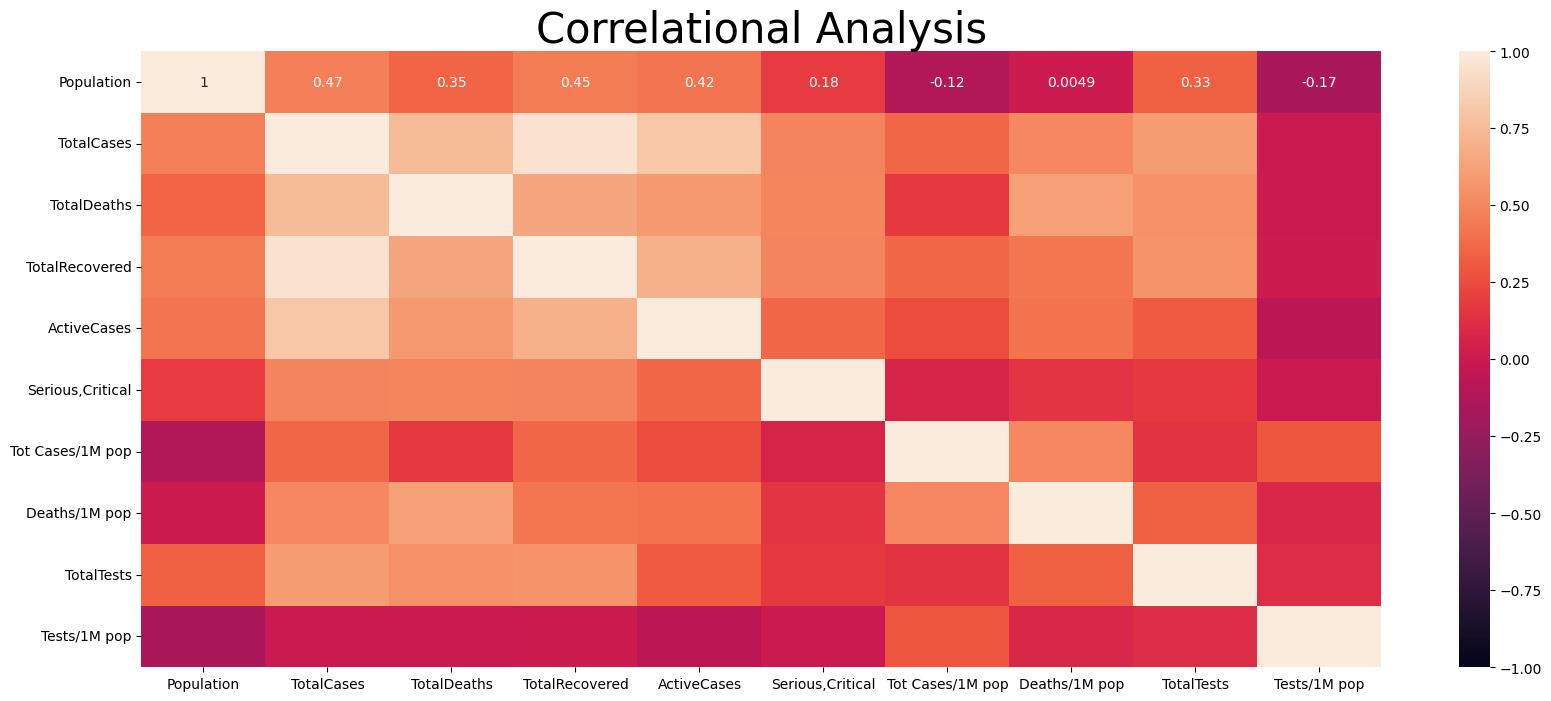

In [155]:
#Visualization
plt.figure(figsize=(20,8))
sns.heatmap(num_corr, vmin = -1, vmax = 1, annot = True)
plt.title('Correlational Analysis', size= 30)
plt.show()

#### Predictive Analysis

In [91]:
#checkpoint 
ml_df = df_cleaned.copy() 

In [92]:
ml_df.head()

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
4,South Africa,Africa,59381566,538184,9604,387316,141264,539,9063,162,3149807,53044,Africa
5,Mexico,North America,129066160,462690,50517,308848,103325,3987,3585,391,1056915,8189,Americas
6,Peru,South America,33016319,455409,20424,310337,124648,1426,13793,619,2493429,75521,Americas
7,Chile,South America,19132514,366671,9889,340168,16614,1358,19165,517,1760615,92022,Americas
9,Spain,Europe,46756648,354530,28500,58878,27664,617,7582,610,7064329,151087,Europe


######  Feature Engineering

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [132]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [94]:
#categorical columns
object_columns = df.select_dtypes(include = ['object'])
object_columns.head()

,Country/Region,Continent,WHO Region
0,USA,North America,Americas
1,Brazil,South America,Americas
2,India,Asia,South-EastAsia
3,Russia,Europe,Europe
4,South Africa,Africa,Africa


In [95]:
#numerical_columns
numerical = df.select_dtypes(include = ['number'])
numerical.head()

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,331198130,5032179,162804,2576668,2292707,18296,15194,492,63139605,190640
1,212710692,2917562,98644,2047660,771258,8318,13716,464,13206188,62085
2,1381344997,2025409,41638,1377384,606387,8944,1466,30,22149351,16035
3,145940924,871894,14606,676357,180931,2300,5974,100,29716907,203623
4,59381566,538184,9604,387316,141264,539,9063,162,3149807,53044


In [96]:
#getting dummies
df_dumy = pd.get_dummies(ml_df, drop_first = True)*1

In [97]:
df_dumy.head()

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,...,Continent_Asia,Continent_Australia/Oceania,Continent_Europe,Continent_North America,Continent_South America,WHO Region_Americas,WHO Region_EasternMediterranean,WHO Region_Europe,WHO Region_South-EastAsia,WHO Region_WesternPacific
4,59381566,538184,9604,387316,141264,539,9063,162,3149807,53044,...,0,0,0,0,0,0,0,0,0,0
5,129066160,462690,50517,308848,103325,3987,3585,391,1056915,8189,...,0,0,0,1,0,1,0,0,0,0
6,33016319,455409,20424,310337,124648,1426,13793,619,2493429,75521,...,0,0,0,0,1,1,0,0,0,0
7,19132514,366671,9889,340168,16614,1358,19165,517,1760615,92022,...,0,0,0,0,1,1,0,0,0,0
9,46756648,354530,28500,58878,27664,617,7582,610,7064329,151087,...,0,0,1,0,0,0,0,1,0,0


In [102]:
pred_df = df_dumy.copy()

In [103]:
#Getting target and feature
feature = pred_df.drop(['TotalDeaths'],axis = 1)
target = pred_df['TotalDeaths']


In [104]:
target.head()

4     9604
5    50517
6    20424
7     9889
9    28500
Name: TotalDeaths, dtype: int32

In [105]:
feature.head()

,Population,TotalCases,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Country/Region_Albania,...,Continent_Asia,Continent_Australia/Oceania,Continent_Europe,Continent_North America,Continent_South America,WHO Region_Americas,WHO Region_EasternMediterranean,WHO Region_Europe,WHO Region_South-EastAsia,WHO Region_WesternPacific
4,59381566,538184,387316,141264,539,9063,162,3149807,53044,0,...,0,0,0,0,0,0,0,0,0,0
5,129066160,462690,308848,103325,3987,3585,391,1056915,8189,0,...,0,0,0,1,0,1,0,0,0,0
6,33016319,455409,310337,124648,1426,13793,619,2493429,75521,0,...,0,0,0,0,1,1,0,0,0,0
7,19132514,366671,340168,16614,1358,19165,517,1760615,92022,0,...,0,0,0,0,1,1,0,0,0,0
9,46756648,354530,58878,27664,617,7582,610,7064329,151087,0,...,0,0,1,0,0,0,0,1,0,0


In [112]:
#initialize the scaler
scaler = StandardScaler()
#fit the features
scaler.fit(feature)

StandardScaler()

In [113]:
feature.head()

,Population,TotalCases,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Country/Region_Albania,...,Continent_Asia,Continent_Australia/Oceania,Continent_Europe,Continent_North America,Continent_South America,WHO Region_Americas,WHO Region_EasternMediterranean,WHO Region_Europe,WHO Region_South-EastAsia,WHO Region_WesternPacific
4,59381566,538184,387316,141264,539,9063,162,3149807,53044,0,...,0,0,0,0,0,0,0,0,0,0
5,129066160,462690,308848,103325,3987,3585,391,1056915,8189,0,...,0,0,0,1,0,1,0,0,0,0
6,33016319,455409,310337,124648,1426,13793,619,2493429,75521,0,...,0,0,0,0,1,1,0,0,0,0
7,19132514,366671,340168,16614,1358,19165,517,1760615,92022,0,...,0,0,0,0,1,1,0,0,0,0
9,46756648,354530,58878,27664,617,7582,610,7064329,151087,0,...,0,0,1,0,0,0,0,1,0,0


In [115]:
scaled_feature = scaler.transform(feature)
scaled_feature

array([[ 1.03088574,  6.01789761,  5.99772803, ..., -0.78605736,
        -0.21764288, -0.28552012],
       [ 2.87839958,  5.11274524,  4.69862306, ..., -0.78605736,
        -0.21764288, -0.28552012],
       [ 0.33187674,  5.02544805,  4.72327473, ..., -0.78605736,
        -0.21764288, -0.28552012],
       ...,
       [-0.5433764 , -0.43462515, -0.41440499, ...,  1.27217179,
        -0.21764288, -0.28552012],
       [-0.54344767, -0.43463714, -0.41442155, ...,  1.27217179,
        -0.21764288, -0.28552012],
       [-0.52759634, -0.43466112, -0.41448777, ..., -0.78605736,
        -0.21764288, -0.28552012]])

###### Data Splitting

In [118]:
from sklearn.model_selection import train_test_split

In [120]:
x_train,x_test,y_train,y_test = train_test_split(scaled_feature, target,test_size = 0.2, random_state=200)

In [122]:
#checking x_shape
x_train.shape,x_test.shape

((159, 217), (40, 217))

In [123]:
#checking Y_shape
y_train.shape, y_test.shape

((159,), (40,))

###### Using LinearRegression Model 

In [121]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [124]:
y_hat = model.predict(x_train)

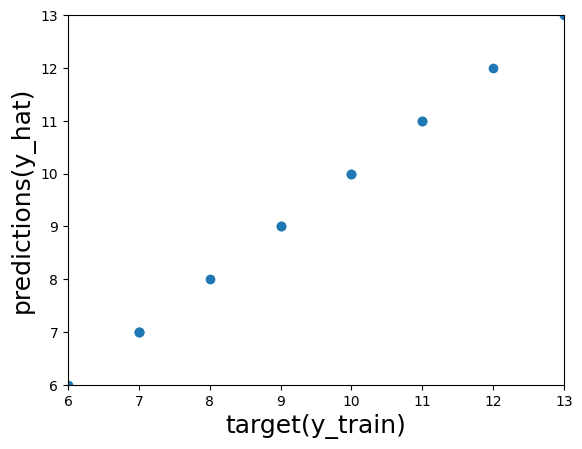

In [125]:
plt.scatter(y_train, y_hat)
plt.xlabel('target(y_train)',size = 18)
plt.ylabel('predictions(y_hat)',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

* The model has passed the homoscedacity test

######  Test with residuals

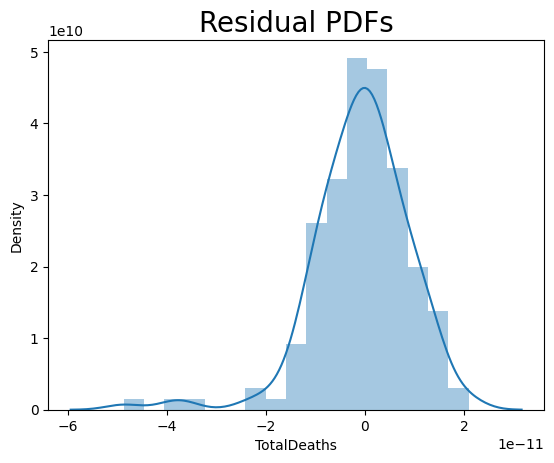

In [126]:
sns.distplot(y_train-y_hat)
plt.title('Residual PDFs', size = 20)
plt.show()

* The residual plot is normal


######  Scorring the model

* R^2

In [127]:
model.score(x_train,y_train)

1.0

In [129]:
model.intercept_

1639.69291220691

In [131]:
model.coef_

array([ 4.47682466e+02,  8.97322508e+02,  5.50806266e+02,  5.25995014e+02,
        8.70988712e+02, -1.23138431e+02,  1.01431122e+03,  8.14621248e+02,
       -8.70810342e+01, -2.17650857e+01, -1.60847945e+01, -3.09991069e+02,
        3.88061883e+01, -1.36534522e+01, -3.66940346e+02, -1.36534523e+01,
       -4.87568272e+01, -1.55093131e+02, -5.39200221e+01,  3.17108016e+00,
        1.33432272e+01, -1.36534523e+01, -3.84918795e+02, -5.94050543e+01,
       -2.04645483e+02,  4.35440053e+01,  2.65483926e+01,  5.58862097e+01,
       -1.01231269e+02, -1.36534523e+01, -3.44801609e+01, -1.23721247e+02,
        6.67243749e+01,  7.83211197e+00, -3.34211562e+01, -8.60840473e+01,
       -1.78166937e+01,  3.99575987e+01, -1.19467707e+01,  8.47355110e+01,
        3.27569749e+01, -1.78081869e+02, -4.96948349e+01, -1.36534523e+01,
       -1.19467707e+01, -1.90630413e+02, -2.81777756e+02, -7.32007176e+01,
       -8.06087618e+01, -3.63291264e+01, -1.02188625e+01,  5.56491160e+00,
       -4.68152629e+01, -

In [133]:
# creating a summary table
model_summary = pd.DataFrame(feature.columns.values, columns = ['Features'])
model_summary['Weights'] = model.coef_
model_summary

,Features,Weights
0,Population,447.682466
1,TotalCases,897.322508
2,TotalRecovered,550.806266
3,ActiveCases,525.995014
4,"Serious,Critical",870.988712
...,...,...
212,WHO Region_Americas,112.040474
213,WHO Region_EasternMediterranean,-65.219054
214,WHO Region_Europe,113.544831
215,WHO Region_South-EastAsia,-57.571337


* Negative means the target decreases as the feature increases
* Positive weght means that the target increases as the feature increases